                                          STOCK PORTFOLIO RECOMMEDNATIO SYSTEM 

GROUP NO:-14
MEMBERS:-YASH RAJ ANAND-24030242076
         SATYAKI SARKAR-24030242056
         SWATI SHARMA-24030242071
         RUPAL MATHUR-24030242054
         AKASH MURUKESH-24030242005


OBJECTIVE:- The primary objective of our project is to develop a robust stock portfolio recommendation system that personalizes investment strategies by tailoring recommendations based on the user's investment amount, risk tolerance, and financial goals. By employing machine learning algorithms, we aim to utilize predictive analytics to forecast stock performance, thereby enhancing decision-making and potentially maximizing returns. Our system will also focus on enhancing user experience by providing a user-friendly interface that allows investors to easily navigate their options and understand the rationale behind portfolio suggestions. Additionally, we will integrate real-time market data to ensure that our recommendations are timely and relevant.

IMPORTING LIBRARIES

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.optimize import minimize

IMPORTING STOCK DATA AS CSV FILE

In [10]:
# List of file paths for each stock dataset
file_paths = [
    "C:/Users/yashv/Downloads/Quote-Equity-TATAMTRDVR-EQ-29-09-2023-to-29-09-202411.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-MARUTI-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-COALINDIA-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-INOXWIND-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-ZOMATO-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-SUZLON-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-KALYANKJIL-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-RVNL-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-HUDCO-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-NBCC-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-RELIANCE-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-TATASTEEL-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-CEATLTD-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-SBIN-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-PNB-EQ-29-09-2023-to-29-09-2024.csv",
]


ANALYZING THE MOVING AVERAGE OF EACH STOCK

In [16]:
import pandas as pd

# Placeholder for your actual file paths
file_paths = [
        "C:/Users/yashv/Downloads/Quote-Equity-TATAMTRDVR-EQ-29-09-2023-to-29-09-202411.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-MARUTI-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-COALINDIA-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-INOXWIND-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-ZOMATO-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-SUZLON-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-KALYANKJIL-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-RVNL-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-HUDCO-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-NBCC-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-RELIANCE-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-TATASTEEL-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-CEATLTD-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-SBIN-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-PNB-EQ-29-09-2023-to-29-09-2024.csv",
    # Add more file paths as needed
]

# Dictionary to store processed data for each stock
stock_data = {}

# Function to calculate SMA
def calculate_sma(df, window):
    return df['close'].rolling(window=window).mean()

# Function to calculate RSI
def calculate_rsi(df, period=14):
    delta = df['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate EMA
def calculate_ema(df, span):
    return df['close'].ewm(span=span, adjust=False).mean()

# Function to calculate MACD
def calculate_macd(df):
    df['EMA12'] = calculate_ema(df, 12)
    df['EMA26'] = calculate_ema(df, 26)
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['MACD Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    return df

# Loop through each file path to process the datasets
for file_path in file_paths:
    try:
        # Read the CSV file
        stock_name = file_path.split('/')[-1].split('.')[0]  # Extract stock name from the file name
        df = pd.read_csv(file_path)

        # Convert the 'Date' column to datetime format
        df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
        df.set_index('Date', inplace=True)

        # Convert 'VOLUME' and 'close' columns to numeric
        df['VOLUME'] = pd.to_numeric(df['VOLUME'], errors='coerce')
        df['close'] = pd.to_numeric(df['close'], errors='coerce')

        # Calculate daily returns
        df['Daily Return'] = df['close'].pct_change(fill_method=None)

        # Calculate volatility
        df['Volatility'] = df['HIGH'] - df['LOW']

        # Calculate moving averages
        df['20-day MA'] = calculate_sma(df, 20)
        df['50-day MA'] = calculate_sma(df, 50)

        # Calculate VWAP
        df['VWAP'] = (df['VOLUME'] * df['close']).cumsum() / df['VOLUME'].cumsum()

        # Calculate additional indicators
        df['RSI'] = calculate_rsi(df)
        df['20-day EMA'] = calculate_ema(df, 20)
        df = calculate_macd(df)

        # Store the processed DataFrame in the dictionary
        stock_data[stock_name] = df

        # Print the first few rows of the processed DataFrame with indicators
        print(f"Processed data for {stock_name}:")
        print(df[['close', '20-day MA', '50-day MA', 'RSI', '20-day EMA', 'MACD', 'MACD Signal']].dropna().head())

    except FileNotFoundError:
        print(f"The file for {file_path} was not found.")
    except Exception as e:
        print(f"An error occurred while processing {stock_name}: {e}")


Processed data for Quote-Equity-TATAMTRDVR-EQ-29-09-2023-to-29-09-202411:
             close  20-day MA  50-day MA        RSI  20-day EMA       MACD  \
Date                                                                         
2024-06-19  652.75   669.3750    709.570  31.891394  669.131842 -18.986181   
2024-06-18  660.75   667.5900    707.412  39.326879  668.333571 -17.358194   
2024-06-14  668.35   666.0150    705.843  45.351986  668.335136 -15.278622   
2024-06-13  666.05   664.6200    704.170  45.331529  668.117504 -13.658689   
2024-06-12  667.75   663.3675    702.405  53.364150  668.082503 -12.098244   

            MACD Signal  
Date                     
2024-06-19   -19.626848  
2024-06-18   -19.173117  
2024-06-14   -18.394218  
2024-06-13   -17.447112  
2024-06-12   -16.377339  
Processed data for Quote-Equity-MARUTI-EQ-29-09-2023-to-29-09-2024:
               close   20-day MA  50-day MA        RSI    20-day EMA  \
Date                                                     

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import statsmodels.api as sm

# Load your processed data
# Assuming stock_data contains your DataFrames for each stock
# For simplicity, let's choose one stock, e.g., TATAMTRDVR
df = stock_data['Quote-Equity-TATAMTRDVR-EQ-29-09-2023-to-29-09-202411']  # Example stock

# Prepare data for LSTM
data = df['close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training and testing datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create sequences
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Create LSTM dataset
time_step = 60  # Number of previous days to consider
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))  # Output layer

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=50)

# Predicting the future prices
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(data, label='Actual Prices')
plt.plot(np.arange(train_size + time_step, len(data)), predictions, label='LSTM Predictions')
plt.title('LSTM Predictions vs Actual Prices')
plt.legend()
plt.show()

# ARIMA Model
# Ensure 'close' column is stationary for ARIMA
df['close_diff'] = df['close'].diff()
df.dropna(inplace=True)

# Fit the ARIMA model
model_arima = sm.tsa.ARIMA(df['close_diff'], order=(5, 1, 0))  # Adjust order as necessary
model_fit = model_arima.fit()

# Forecast future values
forecast = model_fit.forecast(steps=30)  # Forecasting for 30 days

# Prepare the forecast for plotting
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(df['close'], label='Actual Prices')
plt.plot(forecast_series, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Forecast vs Actual Prices')
plt.legend()qa
plt.show()


IndexError: tuple index out of range

In [8]:
# Calculate daily returns
df['Daily Return'] = df['close'].pct_change(fill_method=None)  

# Function to calculate SMA
def calculate_sma(df, window):
    return df['close'].rolling(window=window).mean()

# Function to calculate RSI
def calculate_rsi(df, period=14):
    delta = df['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate EMA
def calculate_ema(df, span):
    return df['close'].ewm(span=span, adjust=False).mean()

# Function to calculate MACD
def calculate_macd(df):
    df['EMA12'] = calculate_ema(df, 12)
    df['EMA26'] = calculate_ema(df, 26)
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['MACD Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    return df

# Loop through each file path to process the datasets
for file_path in file_paths:
    try:
        # Read the CSV file
        stock_name = file_path.split('-')[2]  
        df = pd.read_csv(file_path)
        
        # Convert the 'Date' column to datetime format
        df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
        df.set_index('Date', inplace=True)

        # Convert 'VOLUME' and 'close' columns to numeric
        df['VOLUME'] = pd.to_numeric(df['VOLUME'], errors='coerce')
        df['close'] = pd.to_numeric(df['close'], errors='coerce')

        # Calculate daily returns without warning
        df['Daily Return'] = df['close'].pct_change(fill_method=None)

        # Calculate volatility
        df['Volatility'] = df['HIGH'] - df['LOW']

        # Calculate moving averages
        df['20-day MA'] = calculate_sma(df, 20)
        df['50-day MA'] = calculate_sma(df, 50)

        # Calculate VWAP
        df['VWAP'] = (df['VOLUME'] * df['close']).cumsum() / df['VOLUME'].cumsum()

        # Calculate additional indicators
        df['RSI'] = calculate_rsi(df)
        df['20-day EMA'] = calculate_ema(df, 20)
        df = calculate_macd(df)

        # Store the processed DataFrame in the dictionary
        stock_data[stock_name] = df
        
        # Print the first few rows of the processed DataFrame with indicators
        print(f"Processed data for {stock_name}:")
        print(df[['close', '20-day MA', '50-day MA', 'RSI', '20-day EMA', 'MACD', 'MACD Signal']].dropna().head())
        
    except FileNotFoundError:
        print(f"The file for {file_path} was not found.")
    except Exception as e:
        print(f"An error occurred while processing {stock_name}: {e}")
# Loop through each file path to process the datasets
for file_path in file_paths:
    try:
        # Read the CSV file
        stock_name = file_path.split('-')[2]
        df = pd.read_csv(file_path)
        
        print(f"Initial data for {stock_name}:")
        print(df.head())  # Check initial data
        
        # Date conversion
        df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
        df.set_index('Date', inplace=True)

        # Convert columns to numeric
        df['VOLUME'] = pd.to_numeric(df['VOLUME'], errors='coerce')
        df['close'] = pd.to_numeric(df['close'], errors='coerce')

        # Check for NaN values after conversion
        print(f"Data after conversion for {stock_name}:")
        print(df.head())

        # Calculate features
        df['Daily Return'] = df['close'].pct_change()
        print("Daily Return calculated:")
        print(df[['close', 'Daily Return']].head())

        # Calculate other features...

        # Normalize/standardize
        df = normalize_standardize(df, method='normalize')
        
        # Print processed DataFrame
        print(f"Processed data for {stock_name}:")
        print(df.head())

    except FileNotFoundError:
        print(f"The file for {file_path} was not found.")
    except Exception as e:
        print(f"An error occurred while processing {stock_name}: {e}")



NameError: name 'df' is not defined

In [699]:
print("Data to plot:")
print(df[['close', 'VOLUME']].head())
# Scale down volume for better visibility if necessary
df['VOLUME_scaled'] = df['VOLUME'] / 1e6 

Data to plot:
             close      VOLUME
Date                          
2024-09-27  109.22  40191522.0
2024-09-26  107.29  34719895.0
2024-09-25  105.05  71227249.0
2024-09-24  107.83  79101837.0
2024-09-23  111.51  35372759.0


VISUALIZATION OF EACH STOCK MOVING AVERAGE AND VOLUME

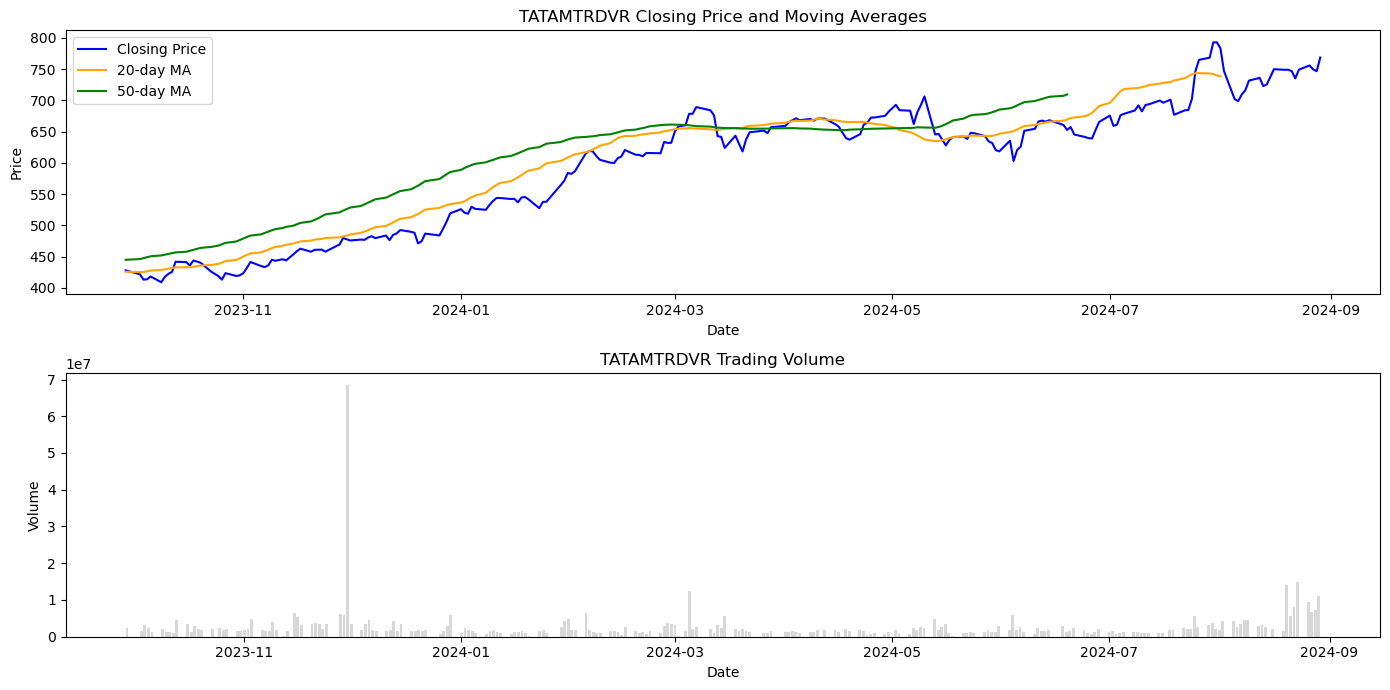

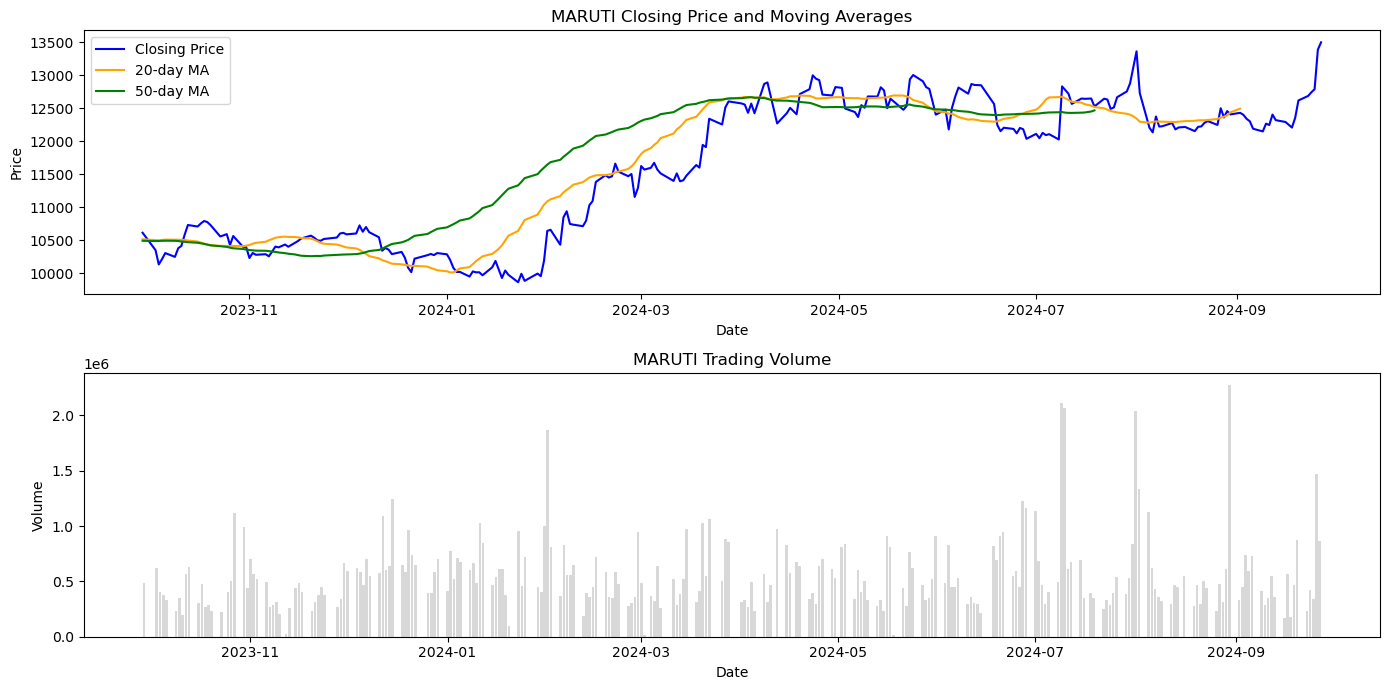

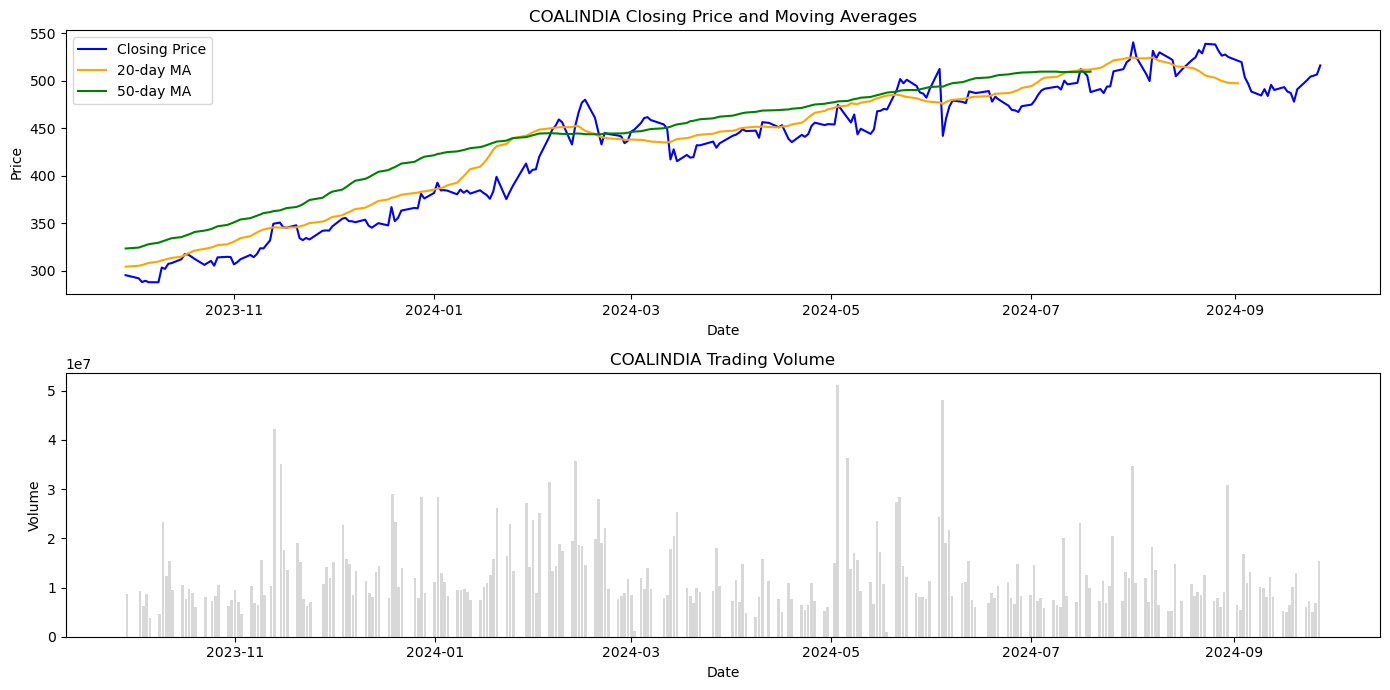

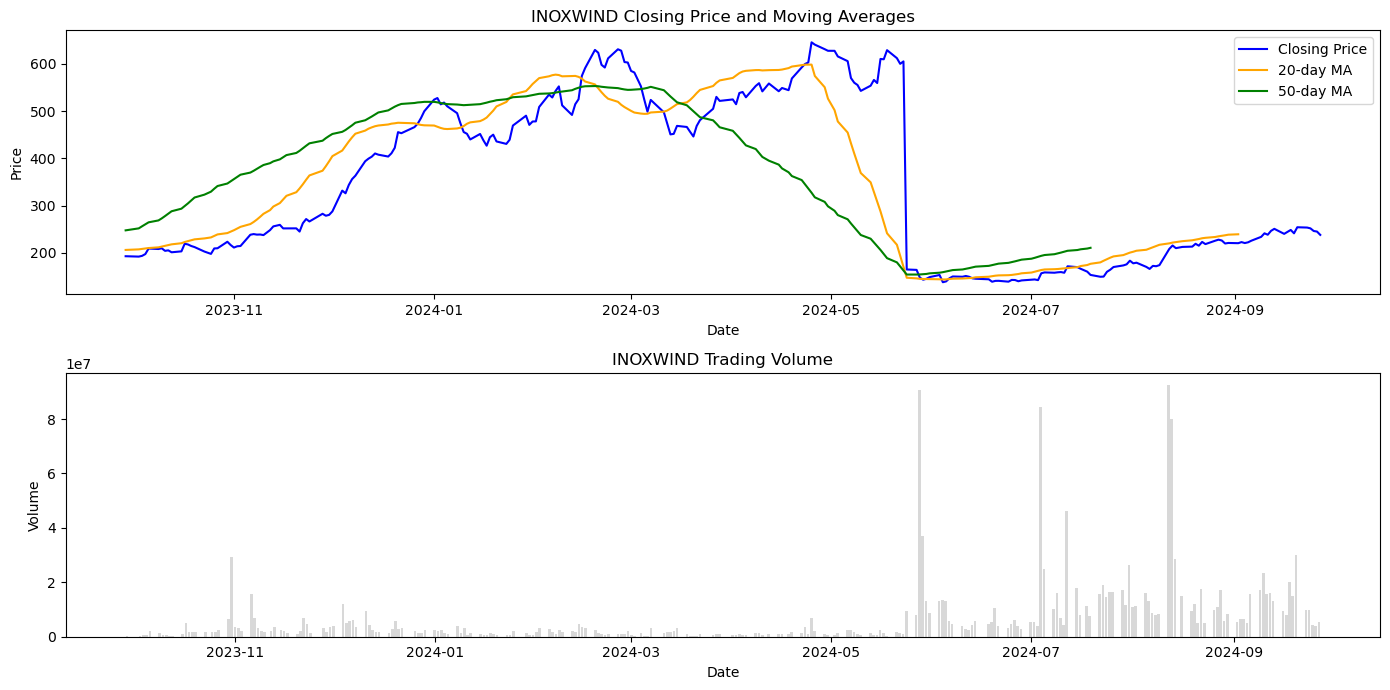

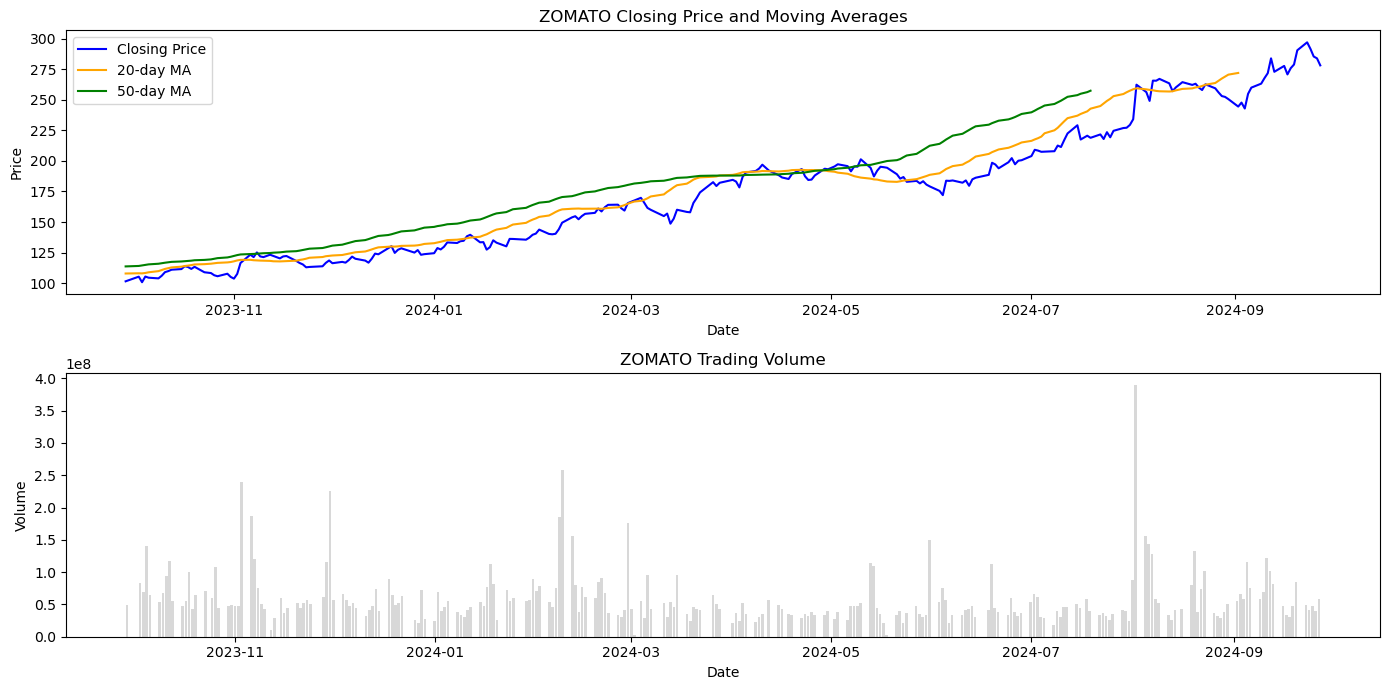

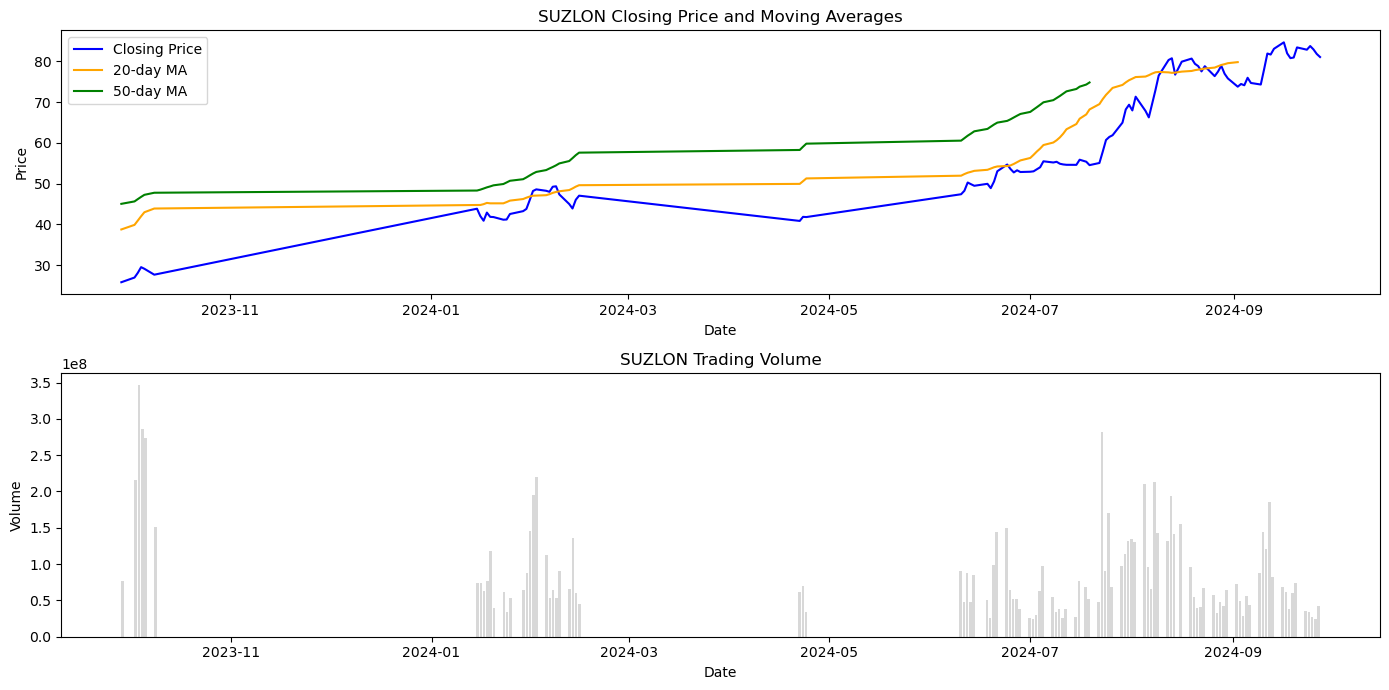

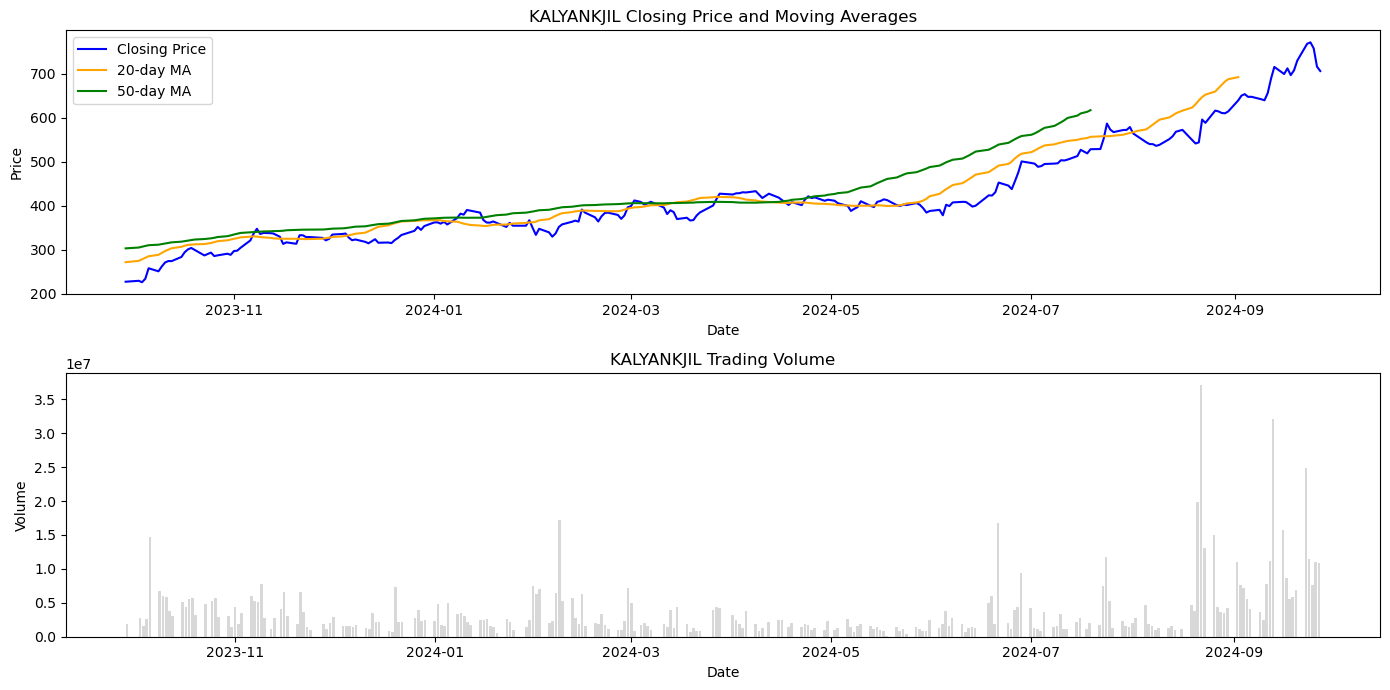

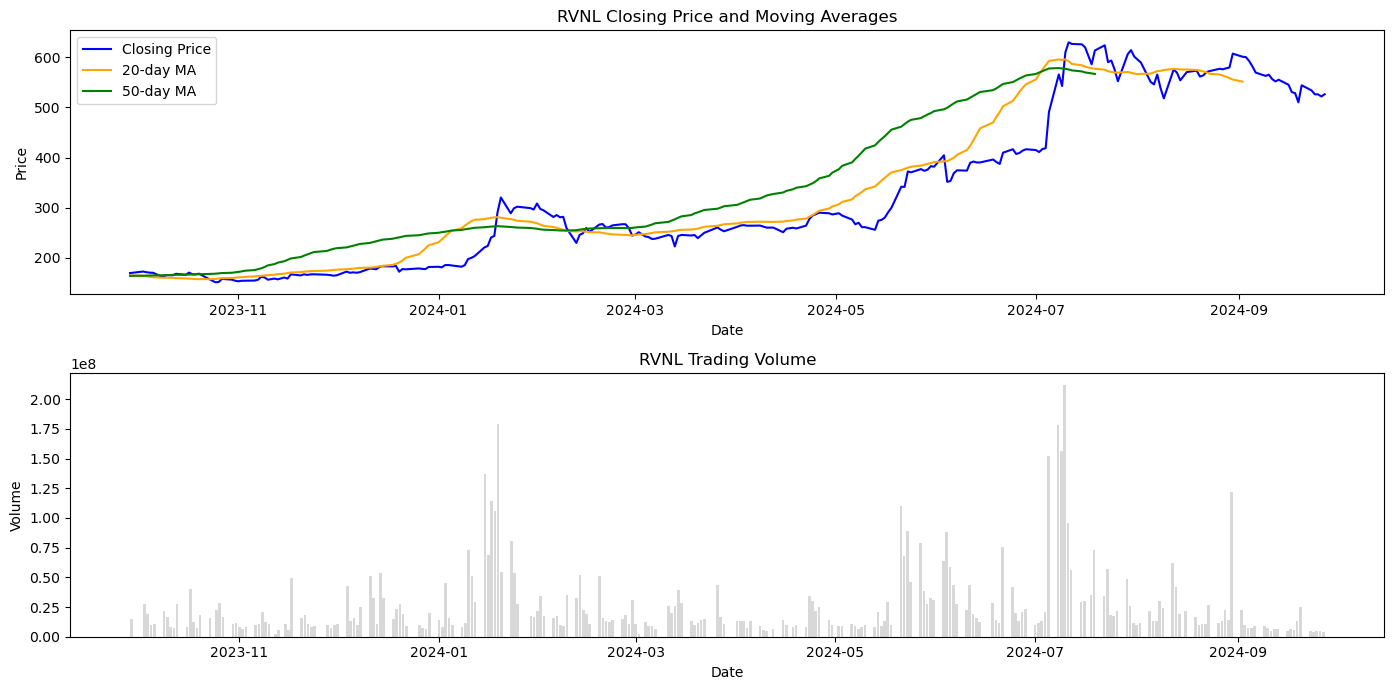

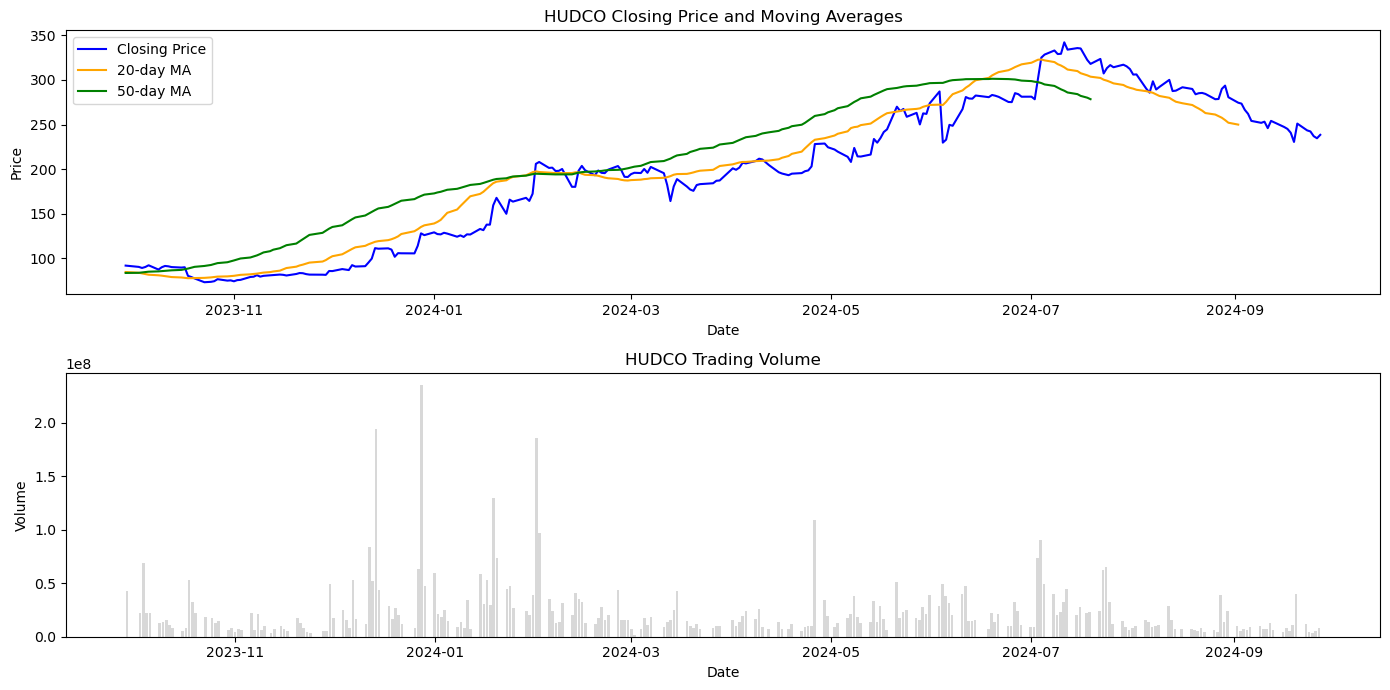

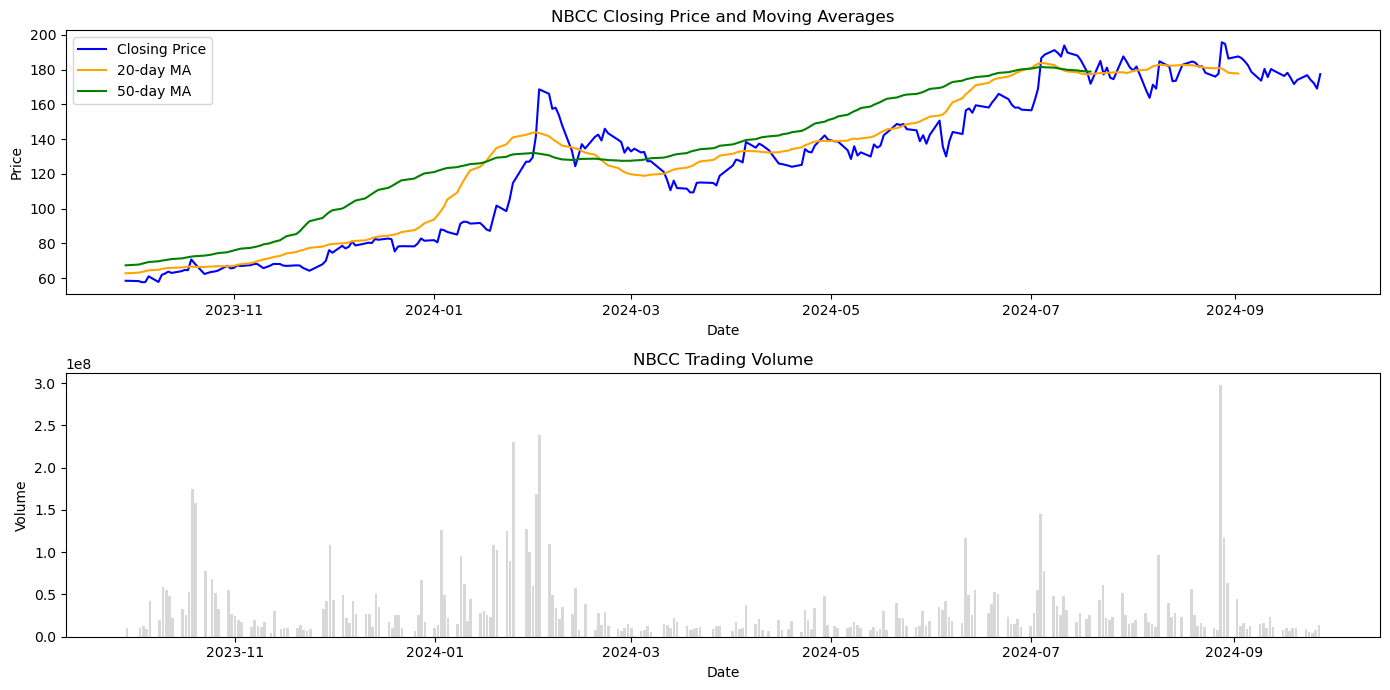

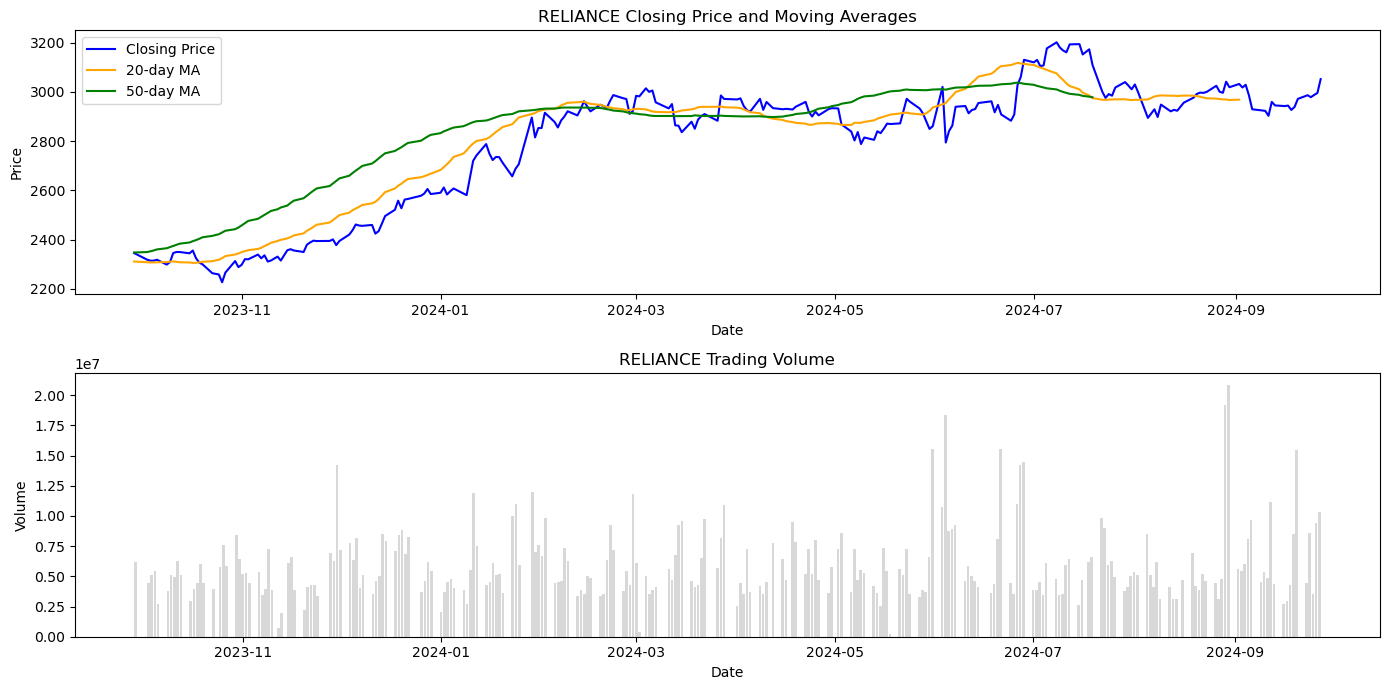

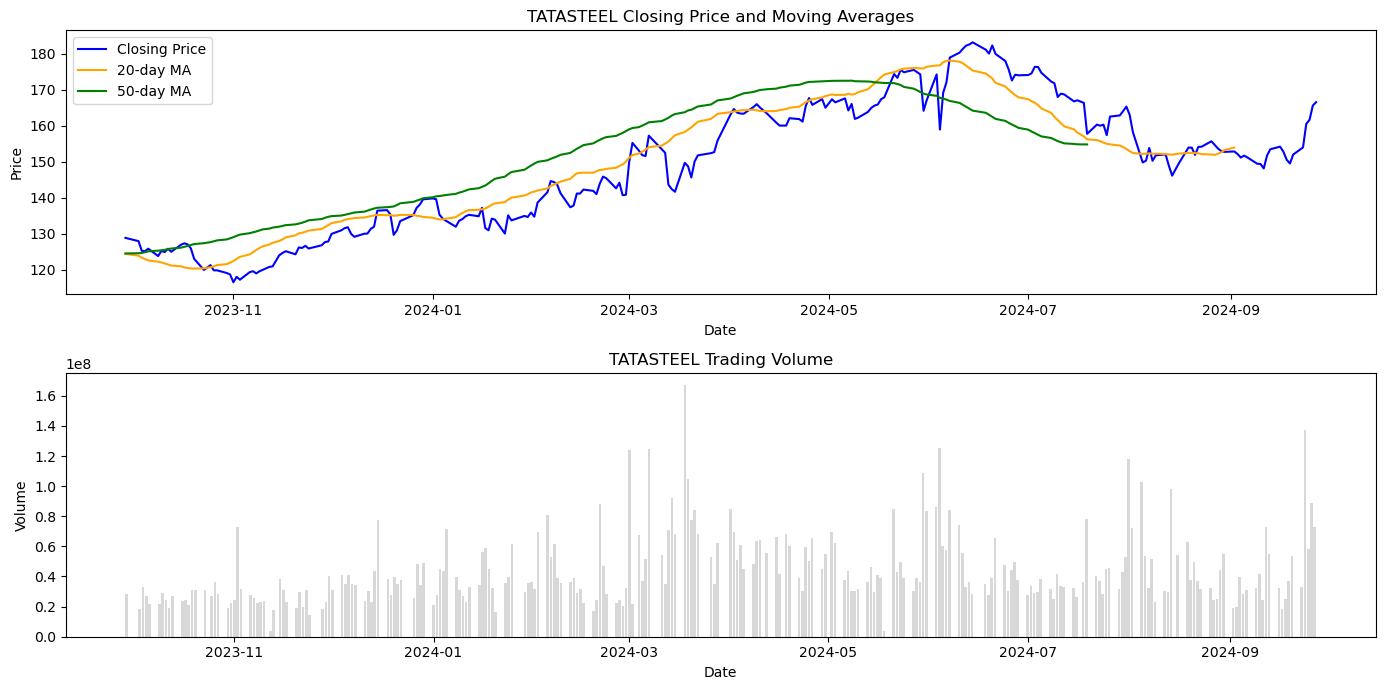

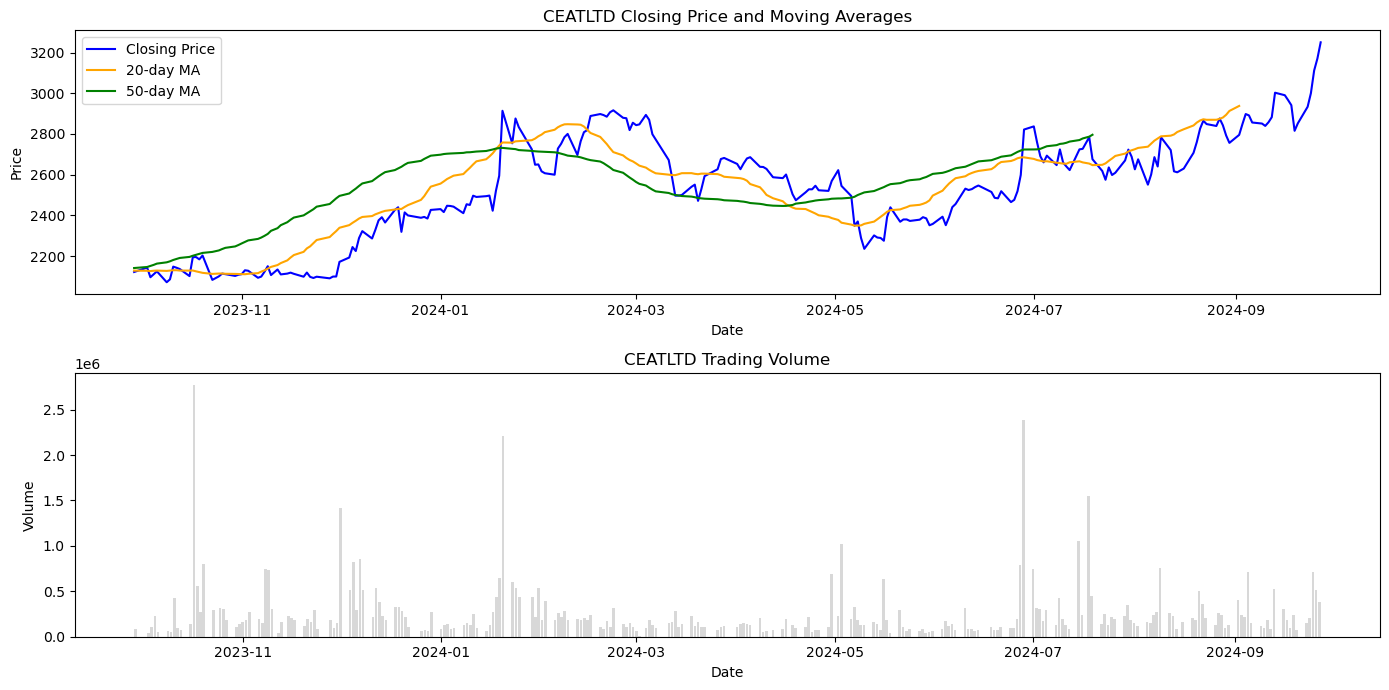

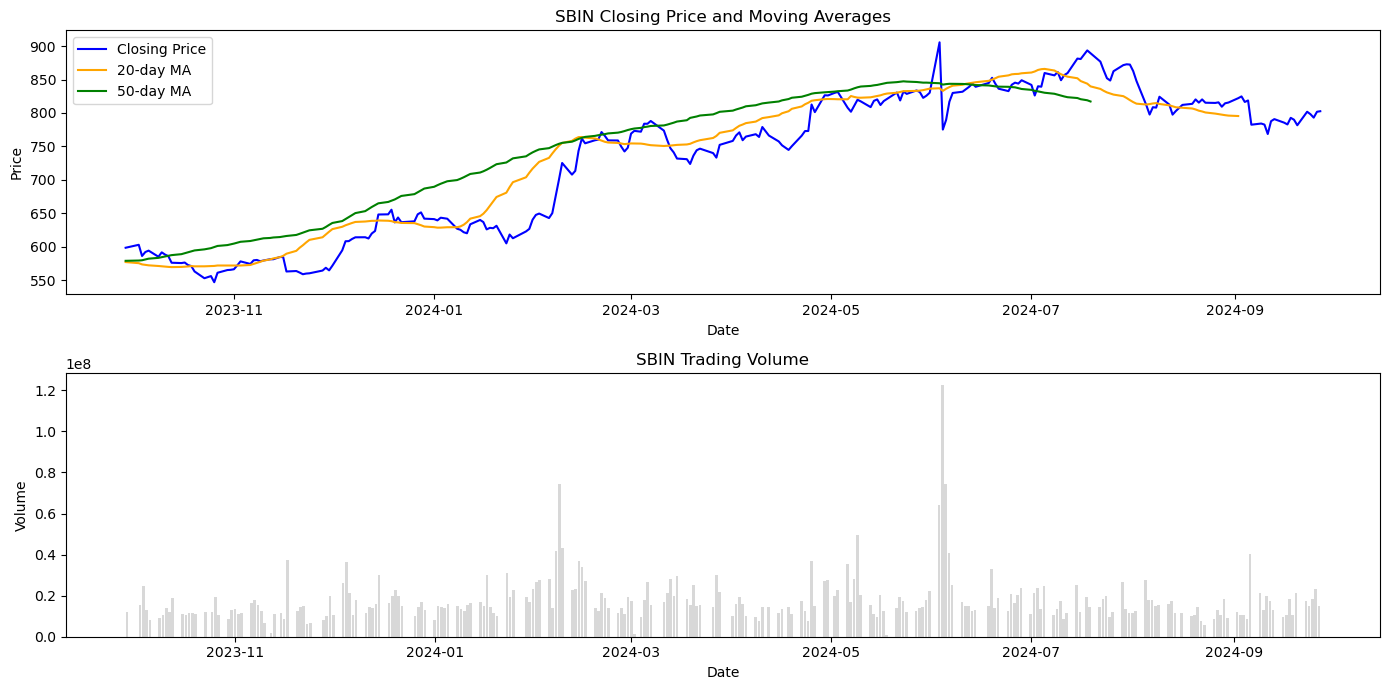

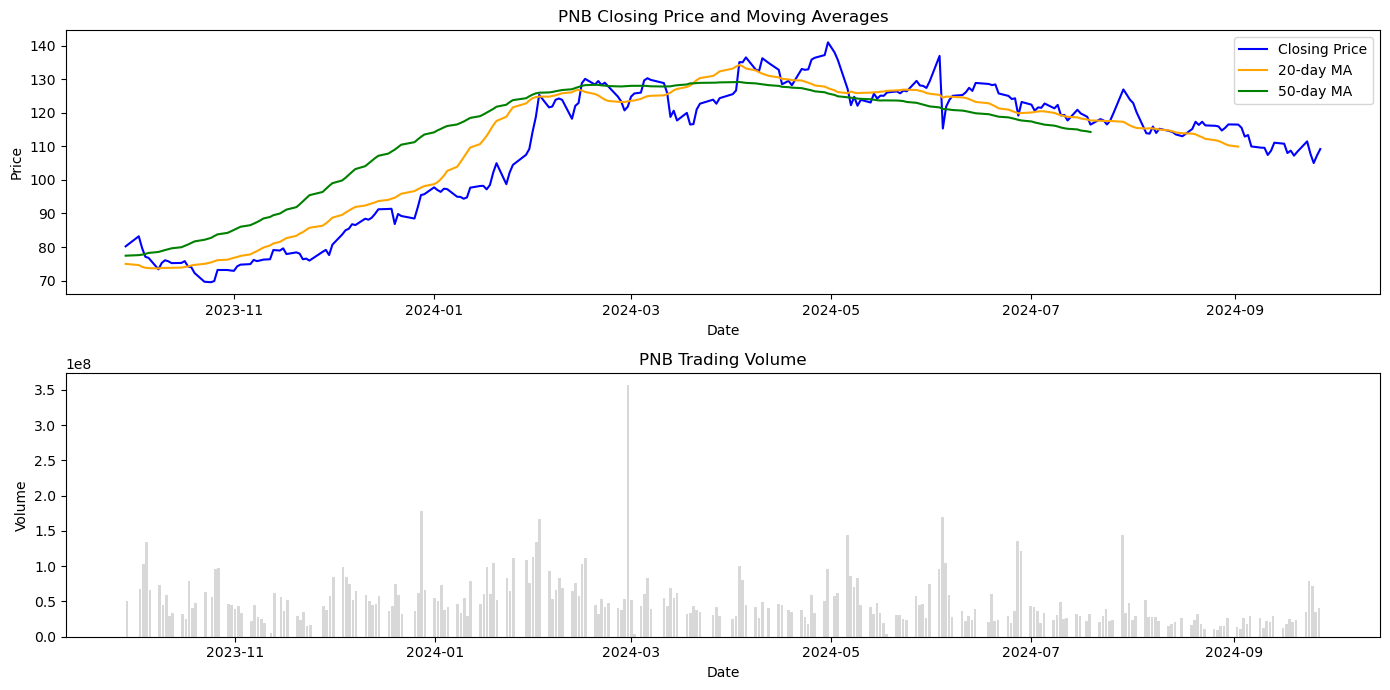

In [703]:
def visualize_trends(df, stock_name):
    plt.figure(figsize=(14, 7))

    # Plot closing prices
    plt.subplot(2, 1, 1)
    plt.plot(df['close'], label='Closing Price', color='blue')
    plt.plot(df['20-day MA'], label='20-day MA', color='orange')
    plt.plot(df['50-day MA'], label='50-day MA', color='green')
    plt.title(f'{stock_name} Closing Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    # Plot volume
    plt.subplot(2, 1, 2)
    plt.bar(df.index, df['VOLUME'], color='gray', alpha=0.3)
    plt.title(f'{stock_name} Trading Volume')
    plt.xlabel('Date')
    plt.ylabel('Volume')

    plt.tight_layout()
    plt.show()

# Example usage
for stock_name, df in stock_data.items():
    visualize_trends(df, stock_name)


PLOTTING THE CORRELATION MATRIX MAP

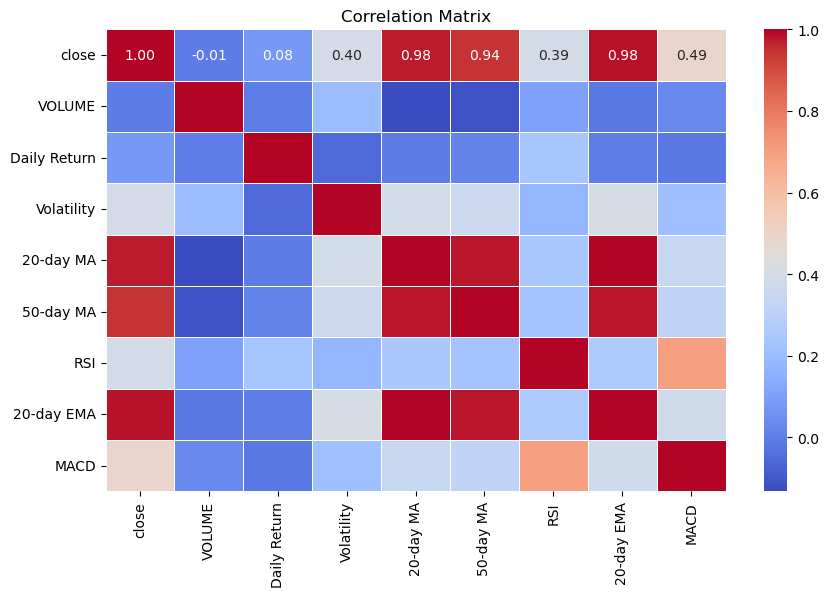

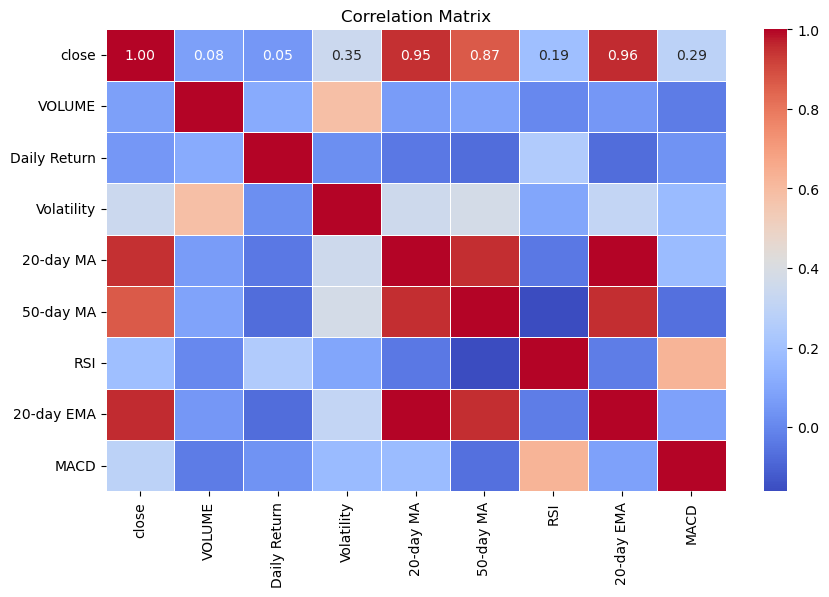

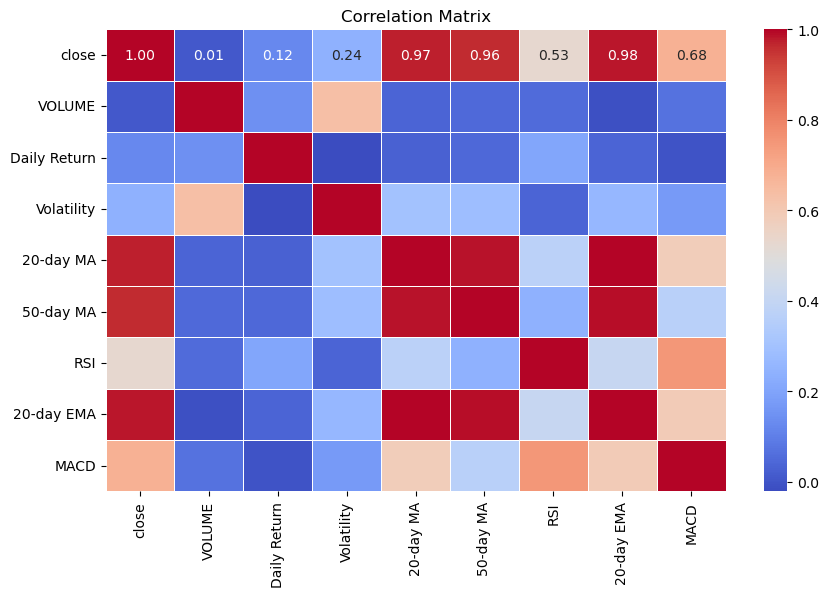

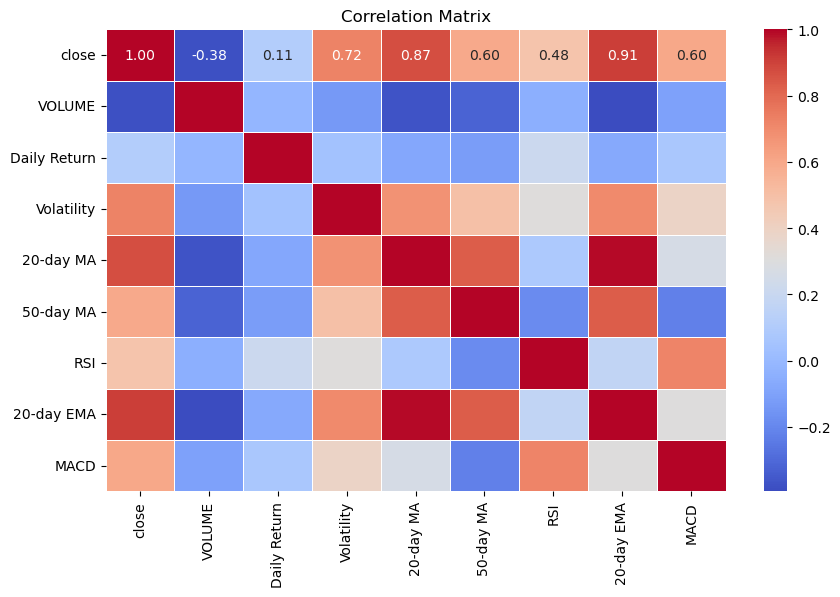

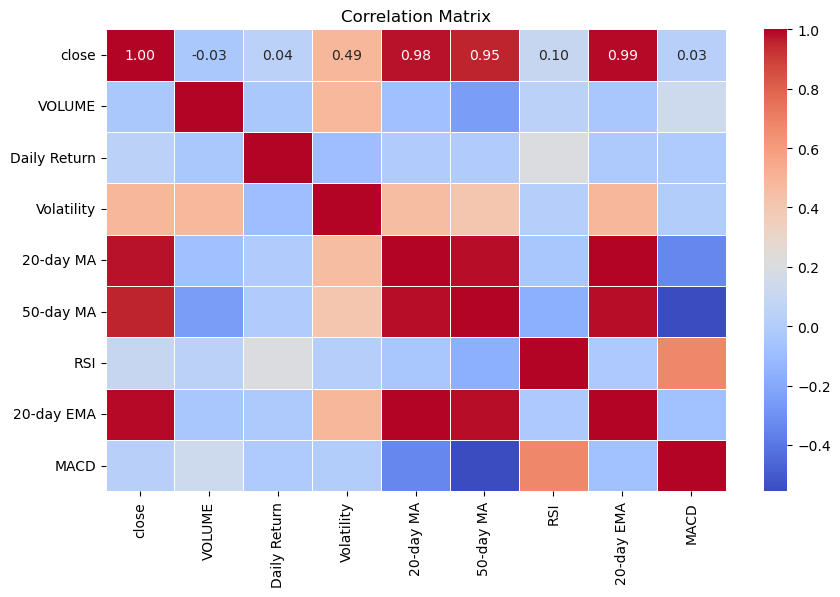

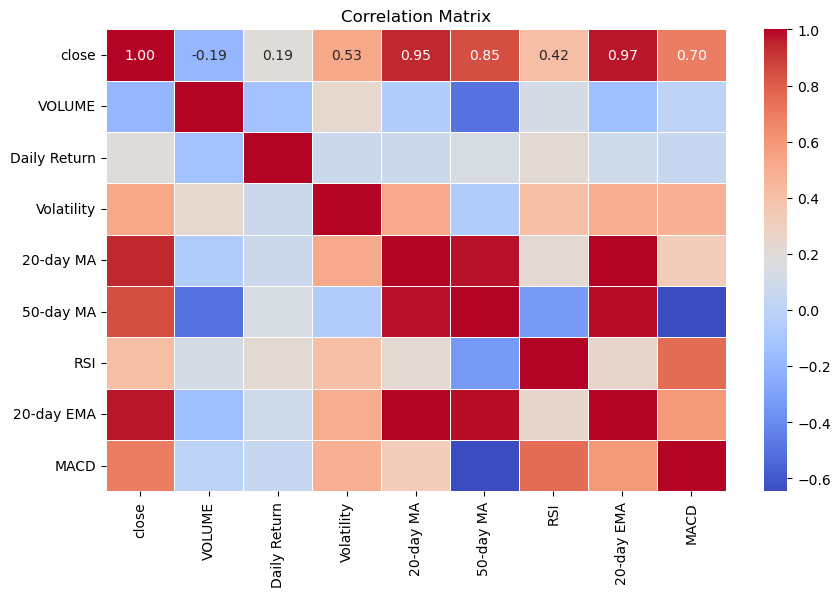

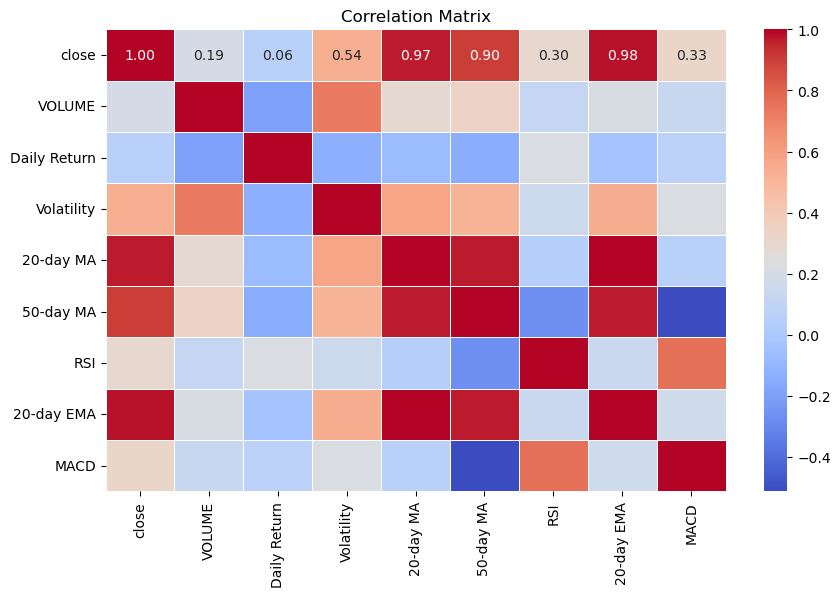

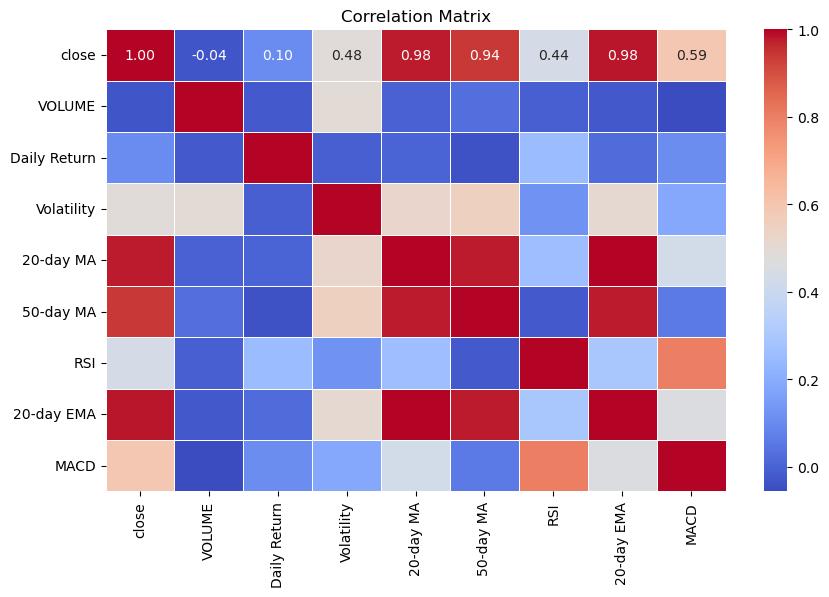

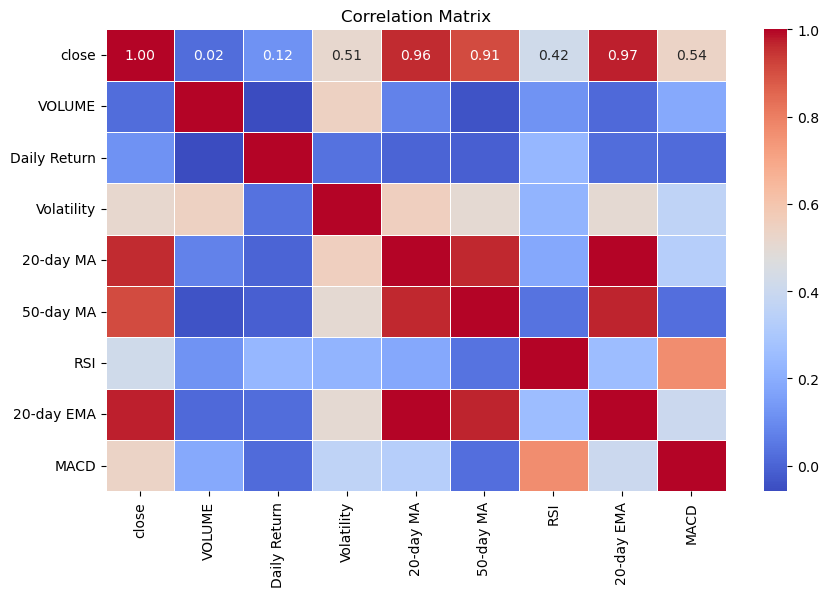

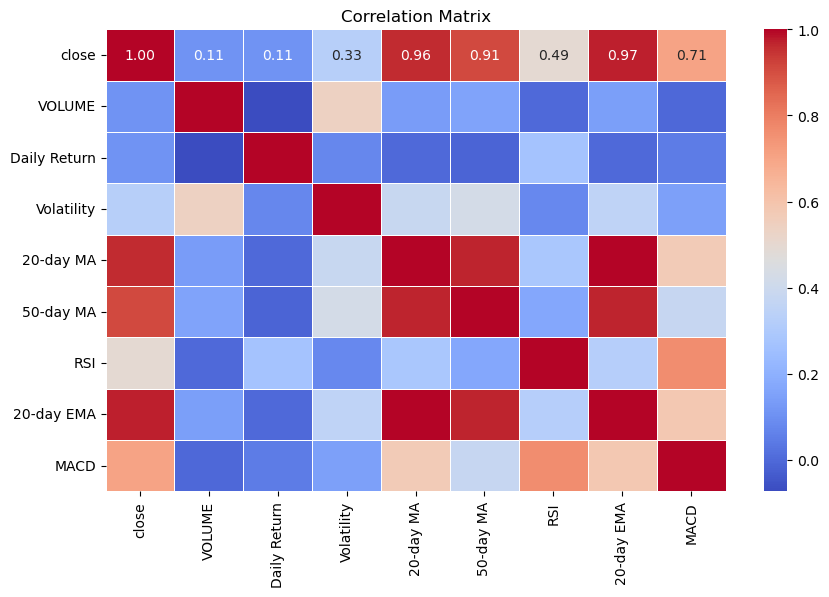

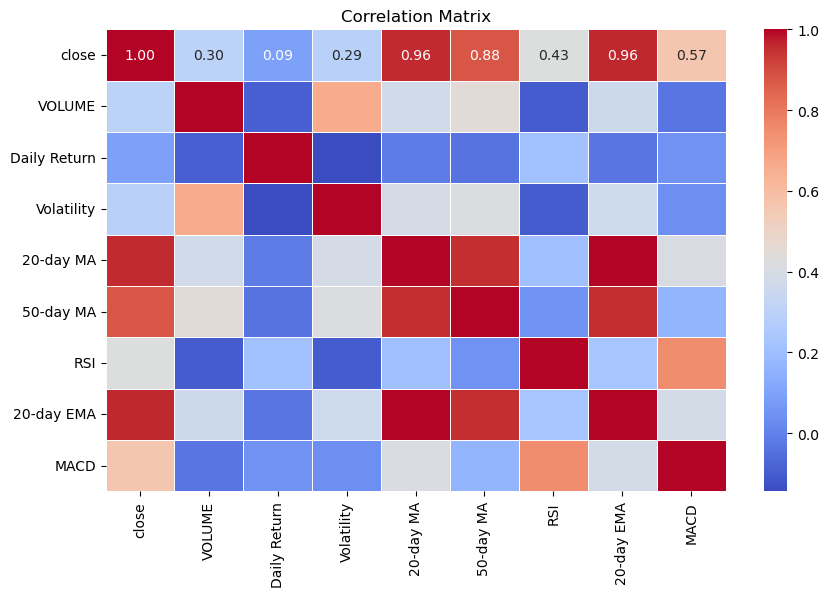

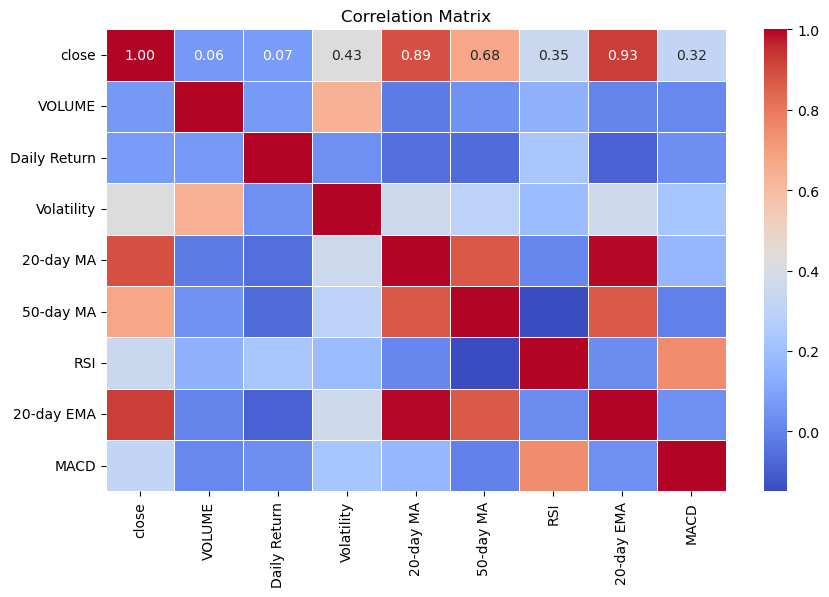

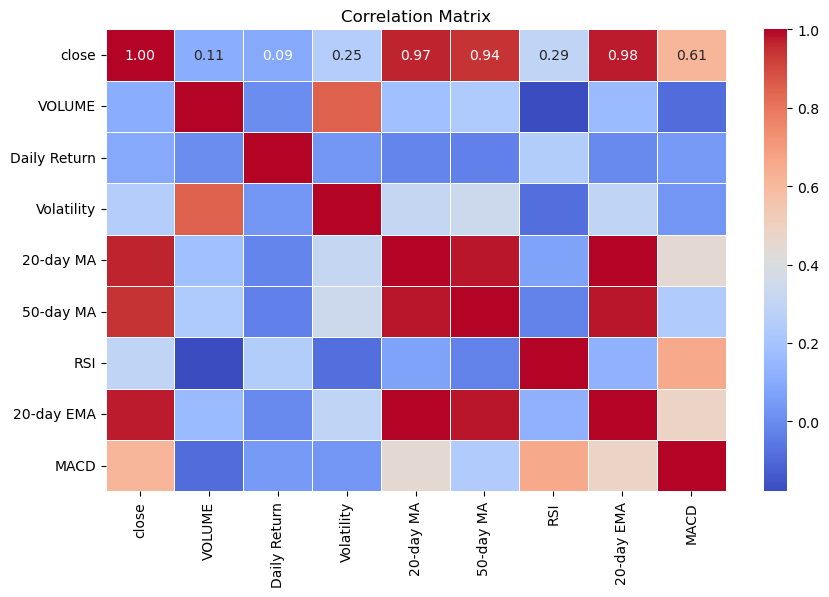

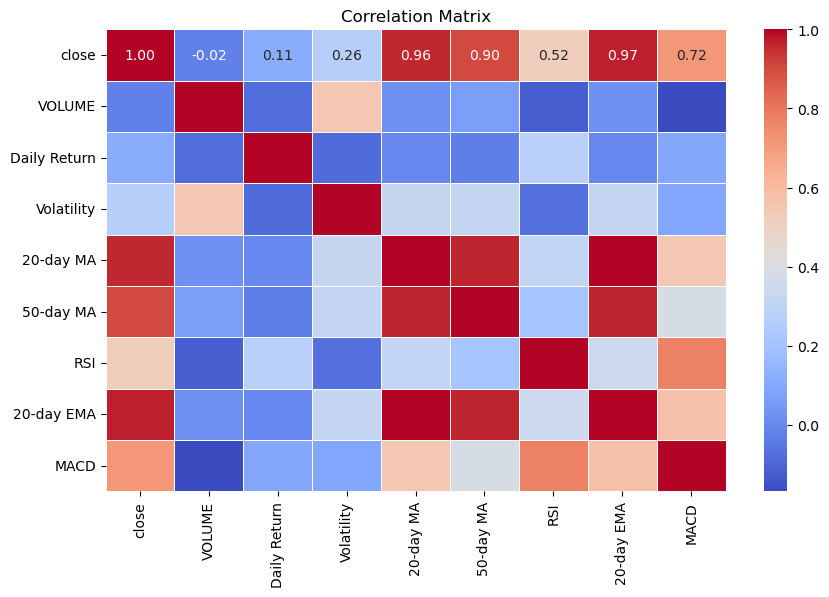

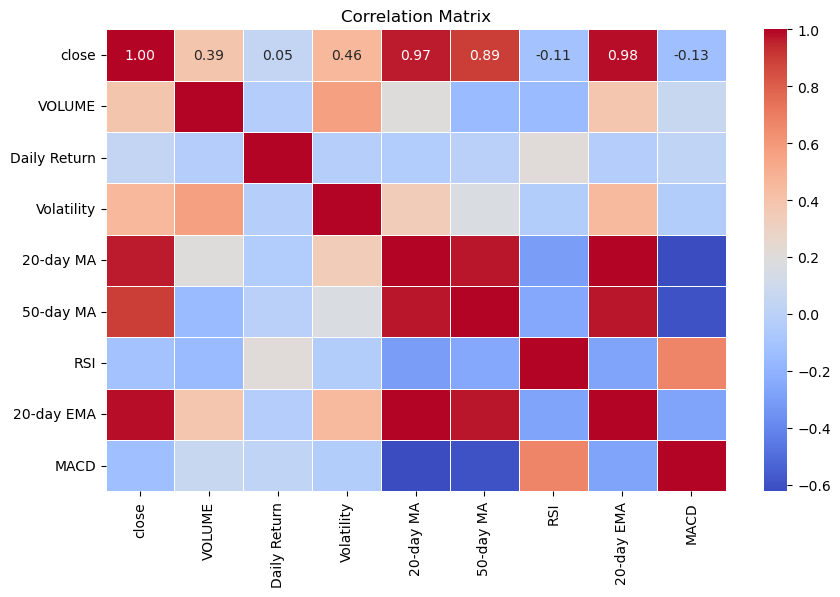

In [435]:
def correlation_analysis(df):
    # Select relevant features for correlation analysis
    features = ['close', 'VOLUME', 'Daily Return', 'Volatility', '20-day MA', '50-day MA', 'RSI', '20-day EMA', 'MACD']
    correlation_matrix = df[features].corr()

    # Plot the correlation matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

# Example usage
for stock_name, df in stock_data.items():
    correlation_analysis(df)


CHECKING THE STOCK IF THEY ARE STATIONARY OR NOT

In [437]:
def check_stationarity(df, feature='close'):
    if df.empty or df[feature].dropna().empty:
        print(f"No valid data available for stationarity check in feature: {feature}")
        return
    
    result = adfuller(df[feature].dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    
    if result[1] <= 0.05:
        print(f'The time series is stationary (reject null hypothesis).')
    else:
        print(f'The time series is non-stationary (fail to reject null hypothesis).')

# Example usage
for stock_name, df in stock_data.items():
    print(f'Stationarity check for {stock_name}:')
    check_stationarity(df, feature='close')


Stationarity check for TATAMTRDVR:
ADF Statistic: -0.2630938405231372
p-value: 0.9305711434040335
The time series is non-stationary (fail to reject null hypothesis).
Stationarity check for MARUTI:
ADF Statistic: -1.7165314015412045
p-value: 0.42261575854930405
The time series is non-stationary (fail to reject null hypothesis).
Stationarity check for COALINDIA:
ADF Statistic: -0.23214531739052954
p-value: 0.934579931577206
The time series is non-stationary (fail to reject null hypothesis).
Stationarity check for INOXWIND:
ADF Statistic: -1.3772754313878666
p-value: 0.5931207829784919
The time series is non-stationary (fail to reject null hypothesis).
Stationarity check for ZOMATO:
ADF Statistic: -1.3463318324918099
p-value: 0.6077181046411502
The time series is non-stationary (fail to reject null hypothesis).
Stationarity check for SUZLON:
ADF Statistic: 0.09907583733578897
p-value: 0.9659979405435885
The time series is non-stationary (fail to reject null hypothesis).
Stationarity check

In [88]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 653.6 kB/s eta 0:03:12
   ---------------------------------------- 0.2/124.9 MB 2.3 MB/s eta 0:00:54
   ---------------------------------------- 0.5/124.9 MB 3.5 MB/s eta 0:00:36
   ---------------------------------------- 0.8/124.9 MB 4.1 MB/s eta 0:00:31
   ---------------------------------------- 1.0/124.9 MB 4.1 MB/s eta 0:00:31
   ---------------------------------------- 1.3/124.9 MB 4.7 MB/s eta 0:00:27
    --------------------------------------- 1.6/124.9 MB 5.0 MB/s eta 0:00:25
    --------------------------------------- 1.9/124.9 MB 5.1 MB/s eta 0:00:24
    --------------------------------------- 1.9/124.9 MB 5.1 MB/s eta 0:00:24
    --------------------------------------- 2.2/124.9 MB 4.6 MB/s eta 0:00:27
    --------------------------------------- 2.3/124.9 MB 4.4 MB/s eta 0:00:2

CHECKING ALL THE COLUMNS

In [615]:
print(df.columns)

Index(['series', 'open', 'high', 'low', 'prev. close', 'ltp', 'close', 'vwap',
       '52w h', '52w l', 'volume', 'value', 'no of trades', 'daily return',
       'volatility', '20-day ma', '50-day ma', 'vwap', 'rsi', '20-day ema',
       'ema12', 'ema26', 'macd', 'macd signal', 'signal', 'Signal',
       '20-day MA', '50-day MA', '20-day EMA', 'RSI', 'MACD', 'Volatility'],
      dtype='object')


In [617]:
# Calculate 20-day Simple Moving Average (SMA)
df['20-day MA'] = df['close'].rolling(window=20).mean()

# Calculate 50-day Simple Moving Average (SMA)
df['50-day MA'] = df['close'].rolling(window=50).mean()

# Calculate 20-day Exponential Moving Average (EMA)
df['20-day EMA'] = df['close'].ewm(span=20, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
delta = df['close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
df['RSI'] = 100 - (100 / (1 + RS))

# Calculate MACD (Moving Average Convergence Divergence)
df['MACD'] = df['close'].ewm(span=12, adjust=False).mean() - df['close'].ewm(span=26, adjust=False).mean()

# Calculate Volatility (using rolling standard deviation)
df['Volatility'] = df['close'].rolling(window=20).std()

# Drop any NaN values after feature engineering
df.dropna(inplace=True)


In [623]:
df['Daily Return'] = df['close'].pct_change()  
# Use binary classification (1 if daily return is positive, 0 if negative or zero)
y = df['Daily Return'] > 0  
X = df[['close', 'RSI', '20-day MA', '50-day MA', '20-day EMA', 'MACD', 'Volatility']]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

TRAINING THE MODEL

In [581]:
for stock_name, df in stock_data.items():
    print(f"Training model for {stock_name}...")

    # Drop rows with NaN values in key columns
    df = df.dropna(subset=['Daily Return', 'Signal', 'RSI', 'MACD', '20-day MA', '50-day MA'])

    # Define the feature set (X) and target (y)
    X = df[['RSI', 'MACD', '20-day MA', '50-day MA', 'Daily Return']]
    y = df['Signal']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"Classification report for {stock_name}:")
    print(classification_report(y_test, y_pred))

    # Print accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {stock_name}: {accuracy * 100:.2f}%\n")


Training model for TATAMTRDVR...
Classification report for TATAMTRDVR:
              precision    recall  f1-score   support

        -1.0       0.50      0.53      0.51        19
         1.0       0.44      0.41      0.42        17

    accuracy                           0.47        36
   macro avg       0.47      0.47      0.47        36
weighted avg       0.47      0.47      0.47        36

Accuracy for TATAMTRDVR: 47.22%

Training model for MARUTI...
Classification report for MARUTI:
              precision    recall  f1-score   support

        -1.0       0.50      0.52      0.51        21
         1.0       0.44      0.42      0.43        19

    accuracy                           0.48        40
   macro avg       0.47      0.47      0.47        40
weighted avg       0.47      0.47      0.47        40

Accuracy for MARUTI: 47.50%

Training model for COALINDIA...
Classification report for COALINDIA:
              precision    recall  f1-score   support

        -1.0       0.62   

C:\Users\yashv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for RELIANCE:
              precision    recall  f1-score   support

        -1.0       0.62      0.57      0.59        23
         1.0       0.47      0.53      0.50        17

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.56      0.55      0.55        40

Accuracy for RELIANCE: 55.00%

Training model for TATASTEEL...
Classification report for TATASTEEL:
              precision    recall  f1-score   support

        -1.0       0.54      0.67      0.60        21
         0.0       0.00      0.00      0.00         1
         1.0       0.50      0.39      0.44        18

    accuracy                           0.53        40
   macro avg       0.35      0.35      0.34        40
weighted avg       0.51      0.53      0.51        40

Accuracy for TATASTEEL: 52.50%

Training model for CEATLTD...


C:\Users\yashv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for CEATLTD:
              precision    recall  f1-score   support

        -1.0       0.56      0.71      0.63        21
         1.0       0.54      0.37      0.44        19

    accuracy                           0.55        40
   macro avg       0.55      0.54      0.53        40
weighted avg       0.55      0.55      0.54        40

Accuracy for CEATLTD: 55.00%

Training model for SBIN...
Classification report for SBIN:
              precision    recall  f1-score   support

        -1.0       0.60      0.68      0.64        22
         1.0       0.53      0.44      0.48        18

    accuracy                           0.57        40
   macro avg       0.57      0.56      0.56        40
weighted avg       0.57      0.57      0.57        40

Accuracy for SBIN: 57.50%

Training model for PNB...
Classification report for PNB:
              precision    recall  f1-score   support

        -1.0       0.73      0.70      0.72        27
         1.0       0.43      

KeyError: ['Daily Return', 'Signal', 'RSI', 'MACD', '20-day MA', '50-day MA']

MODEL PREPARTION USING DIFFERNET METHOD

In [715]:
# Create and train SVM model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Create and train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Create and train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))




SVM Classification Report:
              precision    recall  f1-score   support

       False       0.67      1.00      0.80        20
        True       0.00      0.00      0.00        10

    accuracy                           0.67        30
   macro avg       0.33      0.50      0.40        30
weighted avg       0.44      0.67      0.53        30

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.71      0.85      0.77        20
        True       0.50      0.30      0.37        10

    accuracy                           0.67        30
   macro avg       0.60      0.57      0.57        30
weighted avg       0.64      0.67      0.64        30

XGBoost Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.75      0.71        20
        True       0.38      0.30      0.33        10

    accuracy                           0.60        30
   macro avg       0.53      0.53

C:\Users\yashv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.80      0.80        20
        True       0.60      0.60      0.60        10

    accuracy                           0.73        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.73      0.73      0.73        30



CREATING CLUSTER OF STOCKS

In [601]:
# Check cluster-wise statistics
print(f"\nCluster-wise statistics for {stock_name} (KMeans):")
numeric_columns = df.select_dtypes(include='number').columns  
print(df.groupby('KMeans Cluster')[numeric_columns].mean())  

print(f"\nCluster-wise statistics for {stock_name} (DBSCAN):")
print(df.groupby('DBSCAN Cluster')[numeric_columns].mean())  



Cluster-wise statistics for TATAMTRDVR (KMeans):
                      OPEN        HIGH         LOW  PREV. CLOSE         ltp  \
KMeans Cluster                                                                
0               513.919697  519.212121  507.662121   511.781818  513.871212   
1               443.862766  448.110638  438.560638   441.448936  442.765957   
2               643.721429  651.026020  633.951531   641.260204  642.765306   

                     close        vwap       52W H       52W L        VOLUME  \
KMeans Cluster                                                                 
0               513.443939  513.617879  522.753030  196.787879  1.756399e+06   
1               442.803191  443.165745  457.238298  189.893617  4.080698e+06   
2               642.434694  642.547755  687.569388  230.641327  1.981347e+06   

                ...        VWAP        RSI  20-day EMA       EMA12  \
KMeans Cluster  ...                                                  
0            

In [639]:
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
grid_search_rf.fit(X_train, y_train)
print(f"Best Parameters: {grid_search_rf.best_params_}")


Best Parameters: {'max_depth': 20, 'n_estimators': 100}


Training SVM...
Training Random Forest...
Training XGBoost...
Training Logistic Regression...
                     Accuracy  Precision  Recall  F1 Score  ROC AUC
SVM                  0.666667      0.000     0.0  0.000000   0.2700
Random Forest        0.700000      0.600     0.3  0.400000   0.5825
XGBoost              0.600000      0.375     0.3  0.333333   0.5775
Logistic Regression  0.733333      0.600     0.6  0.600000   0.8550


C:\Users\yashv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


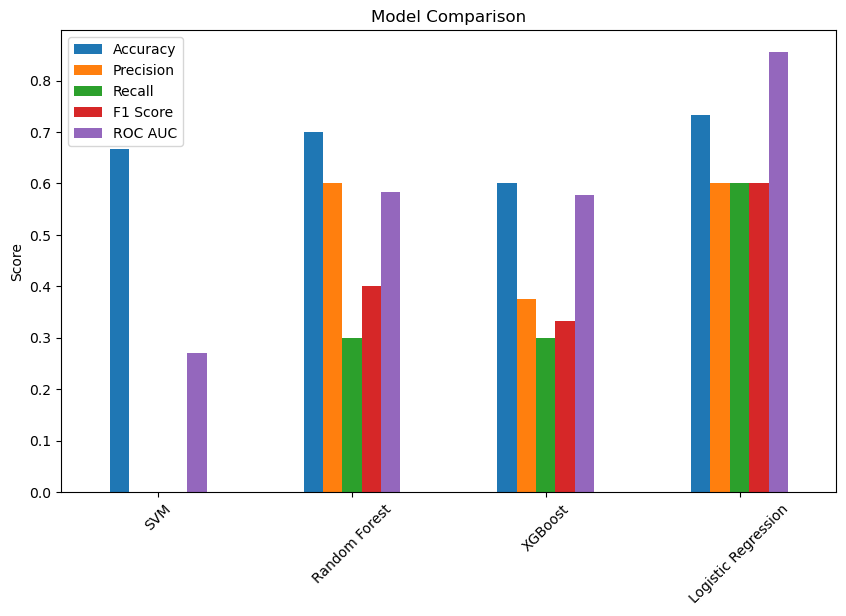

In [641]:
# Defining features (X) and target (y)
X = df[['close', 'RSI', '20-day MA', '50-day MA', '20-day EMA', 'MACD', 'Volatility']]
y = df['Daily Return'] > 0  # Binary classification (up or down)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Dictionary to store models
models = {
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression()
}

# Dictionary to store the results
results = {}

# Function to evaluate the model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  
    
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred_proba)
    }

# Training and evaluating each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  
    results[name] = evaluate_model(model, X_test, y_test)  

# Display the results
results_df = pd.DataFrame(results).T  
print(results_df)

# Optionally, you can plot the performance of the models
import matplotlib.pyplot as plt

results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


CREATING OPTIMIZED STOCK PORTFOLIO BASED ON HISTORICAL DATA

C:\Users\yashv\AppData\Local\Temp\ipykernel_3288\1372070267.py:47: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


Optimal Weights: [1.90531337e-01 2.68139017e-02 6.10100459e-16 0.00000000e+00
 2.75129211e-01 1.23399557e-01 2.72640403e-01 8.85081522e-02
 3.21601469e-16 2.29774380e-02 9.05173289e-17 0.00000000e+00
 7.31429891e-17 0.00000000e+00 0.00000000e+00]
Expected annual return: 1.09
Annual risk (standard deviation): 0.22
Sharpe Ratio: 4.91


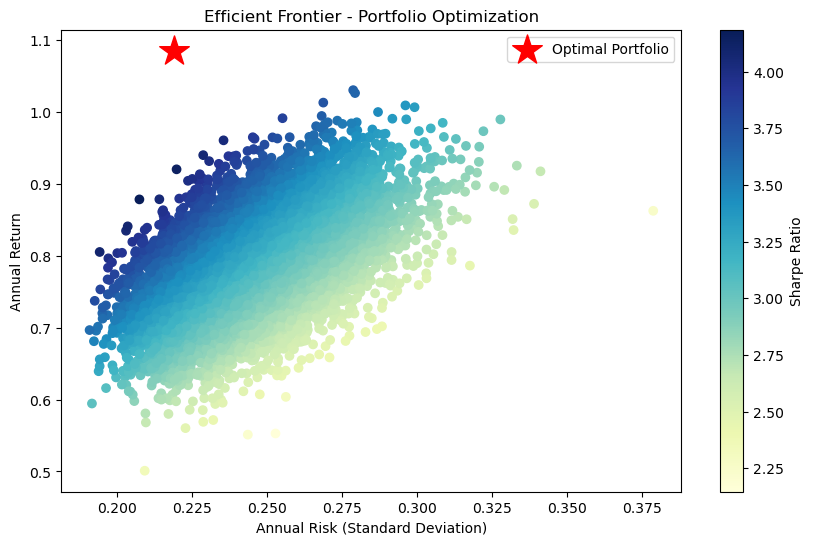

In [645]:
file_paths = [
    "C:/Users/yashv/Downloads/Quote-Equity-TATAMTRDVR-EQ-29-09-2023-to-29-09-202411.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-MARUTI-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-COALINDIA-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-INOXWIND-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-ZOMATO-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-SUZLON-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-KALYANKJIL-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-RVNL-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-HUDCO-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-NBCC-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-RELIANCE-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-TATASTEEL-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-CEATLTD-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-SBIN-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-PNB-EQ-29-09-2023-to-29-09-2024.csv",
]

stock_data = {}

for file_path in file_paths:
    try:
        # Read CSV
        stock_df = pd.read_csv(file_path)
        
        # Ensure the Date column is in the right format
        stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='%d-%m-%Y')
        stock_df.set_index('Date', inplace=True)
        
        # Extract close prices (use the appropriate column for adjusted close prices)
        stock_name = file_path.split('-')[2]  
        stock_data[stock_name] = stock_df['close']  
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

# Combine the close prices into a single DataFrame
prices = pd.DataFrame(stock_data)

# Calculate daily returns
returns = prices.pct_change().dropna()

# 1. Calculate Expected Returns and Covariance Matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# 2. Portfolio Optimization

# Function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(weights * mean_returns) * 252 
    risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)  
    return returns, risk

# Function to calculate negative Sharpe ratio (to maximize Sharpe, we minimize negative Sharpe)
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    p_returns, p_risk = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_returns - risk_free_rate) / p_risk 

# Constraints: sum of weights = 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
bounds = tuple((0, 1) for stock in range(len(stock_data)))  

# Initial guess (equal weights)
init_guess = [1. / len(stock_data)] * len(stock_data)

# Optimize portfolio for maximum Sharpe ratio
optimal_result = minimize(negative_sharpe_ratio, init_guess, args=(mean_returns, cov_matrix),
                          method='SLSQP', bounds=bounds, constraints=constraints)

# Get the optimal weights
optimal_weights = optimal_result.x
print("Optimal Weights:", optimal_weights)

# 3. Calculate the performance of the optimized portfolio
opt_returns, opt_risk = portfolio_performance(optimal_weights, mean_returns, cov_matrix)
print(f"Expected annual return: {opt_returns:.2f}")
print(f"Annual risk (standard deviation): {opt_risk:.2f}")
print(f"Sharpe Ratio: {-(optimal_result.fun):.2f}")

# 4. Plotting the Efficient Frontier

def portfolio_variance(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

# Generate random portfolios
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(stock_data))
    weights /= np.sum(weights)
    returns, risk = portfolio_performance(weights, mean_returns, cov_matrix)
    results[0,i] = risk
    results[1,i] = returns
    results[2,i] = (returns - 0.01) / risk  

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier - Portfolio Optimization')
plt.xlabel('Annual Risk (Standard Deviation)')
plt.ylabel('Annual Return')
plt.colorbar(label='Sharpe Ratio')

# Mark the optimal portfolio
plt.scatter(opt_risk, opt_returns, marker='*', color='r', s=500, label='Optimal Portfolio')
plt.legend(loc='best')
plt.show()

# OUTPUT -  The optimal portfolio is highlighted on the plot, providing a visual representation of the trade-off between risk and return.


In [252]:
pip install statsmodels


CREATING RECOMMEDNATION SYSTEM PARAMETER

In [663]:
class PortfolioRecommendationSystem:
    def __init__(self):
        # Define primary goals
        self.primary_goals = {
            "maximize_returns": True,
            "minimize_risk": True,
            "maximize_sharpe_ratio": True,
            "diversification": True
        }
        
        # Define investment strategy
        self.investment_strategy = {
            "investment_horizon": "long-term",  

        }
        
        # Define performance metrics
        self.performance_metrics = {
            "sharpe_ratio": True,
            "max_drawdown": True,
            "cumulative_return": True,
            "annualized_return": True
        }
        
    def display_objectives(self):
        print("=== Portfolio Recommendation System Objectives ===")
        print("\nPrimary Goals:")
        for goal, value in self.primary_goals.items():
            print(f"- {goal.replace('_', ' ').capitalize()}: {value}")
        
        print("\nInvestment Strategy:")
        for strategy, value in self.investment_strategy.items():
            print(f"- {strategy.replace('_', ' ').capitalize()}: {value}")
        
        print("\nPerformance Metrics:")
        for metric, value in self.performance_metrics.items():
            print(f"- {metric.replace('_', ' ').capitalize()}: {value}")
    
if __name__ == "__main__":
    # Instantiate the PortfolioRecommendationSystem
    portfolio_recommender = PortfolioRecommendationSystem()
    
    # Display the objectives
    portfolio_recommender.display_objectives()


=== Portfolio Recommendation System Objectives ===

Primary Goals:
- Maximize returns: True
- Minimize risk: True
- Maximize sharpe ratio: True
- Diversification: True

Investment Strategy:
- Investment horizon: long-term

Performance Metrics:
- Sharpe ratio: True
- Max drawdown: True
- Cumulative return: True
- Annualized return: True


PREDICTING THE TOP STOCK TO BE INVESTED

            Annualized Return  Annualized Volatility  Sharpe Ratio
TATAMTRDVR           0.886469               0.273807      3.201048
MARUTI               0.307464               0.214311      1.388004
COALINDIA            0.879283               0.347761      2.499657
INOXWIND             1.628472               0.943894      1.714676
ZOMATO               2.004605               0.382575      5.213627
SUZLON               2.866091               0.682789      4.182976
KALYANKJIL           2.435062               0.399059      6.076954
RVNL                 2.818683               0.617465      4.548730
HUDCO                2.252406               0.646961      3.466062
NBCC                 2.722123               0.613758      4.418879
RELIANCE             0.337697               0.210340      1.557938
TATASTEEL            0.355471               0.292491      1.181136
CEATLTD              0.638765               0.346207      1.816153
SBIN                 0.405313               0.283821      1.39

C:\Users\yashv\AppData\Local\Temp\ipykernel_3288\4149514075.py:47: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


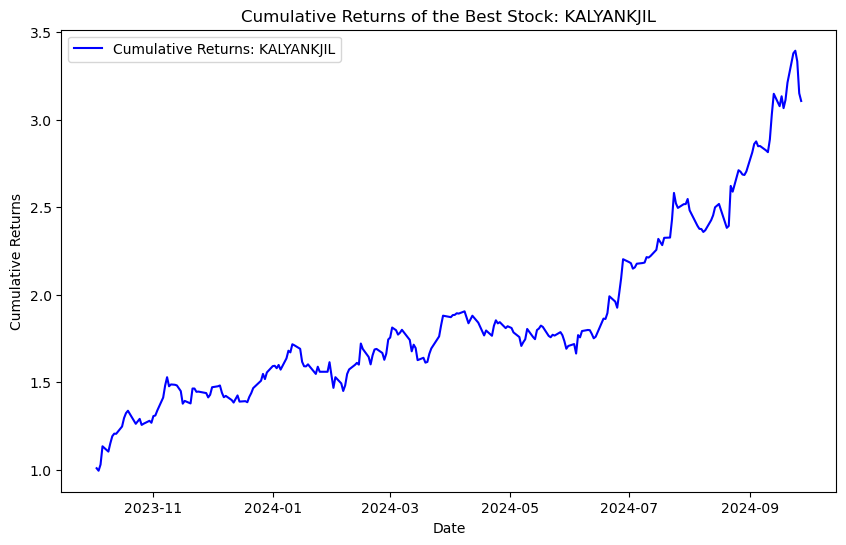

In [665]:
file_paths = [
    "C:/Users/yashv/Downloads/Quote-Equity-TATAMTRDVR-EQ-29-09-2023-to-29-09-202411.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-MARUTI-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-COALINDIA-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-INOXWIND-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-ZOMATO-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-SUZLON-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-KALYANKJIL-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-RVNL-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-HUDCO-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-NBCC-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-RELIANCE-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-TATASTEEL-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-CEATLTD-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-SBIN-EQ-29-09-2023-to-29-09-2024.csv",
    "C:/Users/yashv/Downloads/Quote-Equity-PNB-EQ-29-09-2023-to-29-09-2024.csv",
]

# Read data from each CSV and store adjusted close prices
stock_data = {}

for file_path in file_paths:
    try:
        # Read CSV
        stock_df = pd.read_csv(file_path)
        
        # Ensure the Date column is in the right format
        stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='%d-%m-%Y')
        stock_df.set_index('Date', inplace=True)
        
        # Extract close prices (use the appropriate column for adjusted close prices)
        stock_name = file_path.split('-')[2]  
        stock_data[stock_name] = stock_df['close']  
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

# Combine the close prices into a single DataFrame
prices = pd.DataFrame(stock_data)

# Calculate daily returns
returns = prices.pct_change().dropna()

# Function to calculate annualized return
def annualized_return(daily_returns):
    return ((1 + daily_returns.mean()) ** 252) - 1

# Function to calculate annualized volatility
def annualized_volatility(daily_returns):
    return daily_returns.std() * np.sqrt(252)

# Function to calculate Sharpe ratio (assuming a risk-free rate of 1%)
def sharpe_ratio(daily_returns, risk_free_rate=0.01):
    return (annualized_return(daily_returns) - risk_free_rate) / annualized_volatility(daily_returns)

# Analyze each stock's performance
performance = {}

for stock in returns.columns:
    stock_returns = returns[stock]
    performance[stock] = {
        'Annualized Return': annualized_return(stock_returns),
        'Annualized Volatility': annualized_volatility(stock_returns),
        'Sharpe Ratio': sharpe_ratio(stock_returns)
    }

# Convert performance metrics to a DataFrame for easier comparison
performance_df = pd.DataFrame(performance).T
print(performance_df)

# 4. Find the best stock based on Sharpe ratio
best_stock = performance_df['Sharpe Ratio'].idxmax()
print(f"Best Stock based on Sharpe Ratio: {best_stock}")

# 5. Plot the cumulative returns of the best stock
cumulative_returns = (1 + returns[best_stock]).cumprod()
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label=f'Cumulative Returns: {best_stock}', color='blue')
plt.title(f'Cumulative Returns of the Best Stock: {best_stock}')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(loc='best')
plt.show()


FINDING THE CUMALATIVE OF BEST 3 STOCK TO CREATE A RECOMMEDNATION BASKET

Top 3 Stocks based on Sharpe Ratio:
            Annualized Return  Annualized Volatility  Sharpe Ratio
KALYANKJIL           2.435062               0.399059      6.076954
ZOMATO               2.004605               0.382575      5.213627
RVNL                 2.818683               0.617465      4.548730


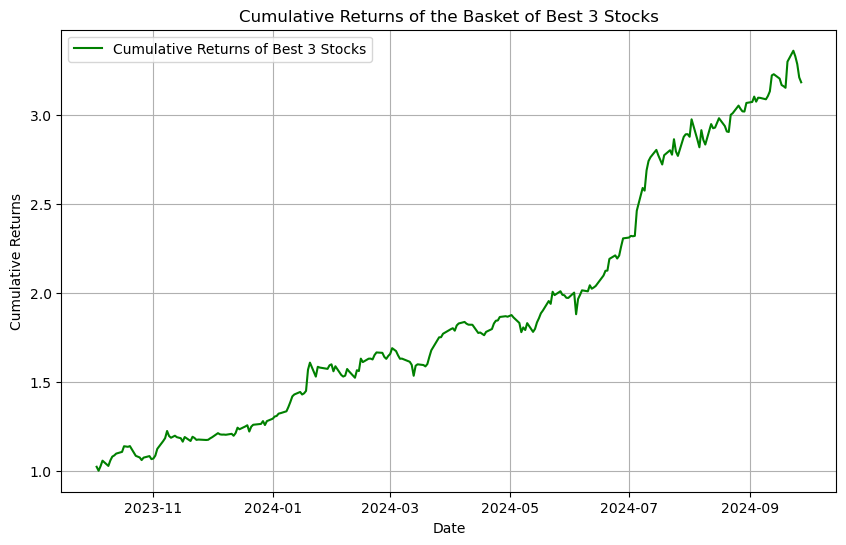

Top 3 Stocks based on Sharpe Ratio:
            Annualized Return  Annualized Volatility  Sharpe Ratio
KALYANKJIL           2.435062               0.399059      6.076954
ZOMATO               2.004605               0.382575      5.213627
RVNL                 2.818683               0.617465      4.548730
Percentage Profit for the Top 3 Stocks over One Year:
KALYANKJIL: 210.57%
ZOMATO: 174.04%
RVNL: 210.62%


In [671]:
top_stocks = performance_df.sort_values(by='Sharpe Ratio', ascending=False).head(3)

print("Top 3 Stocks based on Sharpe Ratio:")
print(top_stocks)

# Extract the top 3 stock names
top_stock_names = top_stocks.index.tolist()

# Calculate weights for equal allocation in the basket
num_stocks = len(top_stock_names)
equal_weights = np.array([1/num_stocks] * num_stocks)

# Create a DataFrame for cumulative returns of the basket
basket_returns = returns[top_stock_names].dot(equal_weights)

# Calculate cumulative returns for the basket
cumulative_basket_returns = (1 + basket_returns).cumprod()

# Plot the cumulative returns of the basket
plt.figure(figsize=(10, 6))
plt.plot(cumulative_basket_returns, label='Cumulative Returns of Best 3 Stocks', color='green')
plt.title('Cumulative Returns of the Basket of Best 3 Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(loc='best')
plt.grid()
plt.show()

# Assuming you have already defined the performance_df and calculated the top 3 stocks
top_stocks = performance_df.sort_values(by='Sharpe Ratio', ascending=False).head(3)

print("Top 3 Stocks based on Sharpe Ratio:")
print(top_stocks)

# Extract the top 3 stock names
top_stock_names = top_stocks.index.tolist()

# Calculate the cumulative returns for each of the top 3 stocks
cumulative_returns = (1 + returns[top_stock_names]).cumprod()

# Calculate the percentage profit for each stock over one year
percentage_profit = (cumulative_returns.iloc[-1] - 1) * 100  

# Display the percentage profit for each of the top 3 stocks
print("Percentage Profit for the Top 3 Stocks over One Year:")
for stock, profit in percentage_profit.items():
    print(f"{stock}: {profit:.2f}%")


CREATING A USER INTERAFCE TO MANAGE THE INVESTMENT AMOUNT

In [677]:
def allocate_investment_proportional(total_investment_lakhs, top_stock_names, percentage_profit):
    # Convert lakhs to actual amount
    total_investment = total_investment_lakhs * 100000  # Convert to INR

    # Calculate total profit for allocation
    total_profit = percentage_profit.sum()

    # Calculate the investment for each stock based on its profit ratio
    investment_allocation = {stock: (profit / total_profit) * total_investment for stock, profit in percentage_profit.items()}

    return investment_allocation

# Get user input for total investment in lakhs
try:
    user_input = float(input("Enter the amount to invest (in lakhs): "))
    if user_input <= 0:
        raise ValueError("Investment must be greater than zero.")

    percentage_profit = (cumulative_returns.iloc[-1] - 1) * 100  

    # Allocate investment proportionally based on profit
    investment_allocation = allocate_investment_proportional(user_input, top_stock_names, percentage_profit)

    # Display the investment allocation
    print("Investment Allocation for the Top 3 Stocks (Based on Profit):")
    for stock, amount in investment_allocation.items():
        print(f"{stock}: ₹{amount:.2f}")

except ValueError as e:
    print(f"Invalid input: {e}")


Enter the amount to invest (in lakhs):  1000000


Investment Allocation for the Top 3 Stocks (Based on Profit):
KALYANKJIL: ₹35376024479.11
ZOMATO: ₹29238963466.19
RVNL: ₹35385012054.70
